df = pd.read_csv("one-year-of-tsla-on-reddit-posts.csv")
df_comments = pd.read_csv("one-year-of-tsla-on-reddit-comments.csv")

In [4]:
import pandas as pd
from datetime import datetime, timedelta, date
import time
from transformers import pipeline

/Users/damien/.pyenv/versions/3.10.6/envs/financial_forecast_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [111]:
df_comments = pd.read_csv('one-year-of-tsla-on-reddit-comments.csv')

In [59]:
df = pd.read_csv('one-year-of-tsla-on-reddit-posts.csv')

In [60]:
df

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vrkdvj,4430vb,ultraalgo,False,1656977609,https://old.reddit.com/r/UltraAlgo/comments/vrkdvj/tsla_1038_net_profit_across_11_trades_90_accuracy/,pbs.twimg.com,http://pbs.twimg.com/media/FW2_yU1WQAEiRgC.jpg,NaN,$TSLA $1038 net profit across 11 trades. 90% Accuracy with 3 profit factor in a 15 minute chart. Waiting for Buy Signal Start a free trial here: https://t.co/yV6BCXxMw6 https://t.co/JqLoRmLeBK,2
1,post,vrjowr,2th52,wallstreetbets,False,1656975472,https://old.reddit.com/r/wallstreetbets/comments/vrjowr/tsla_80085_incoming/,i.redd.it,https://i.redd.it/cgnm1ptsao991.jpg,NaN,TSLA 800.85 INCOMING,1
2,post,vrjb37,2th52,wallstreetbets,False,1656974317,https://old.reddit.com/r/wallstreetbets/comments/vrjb37/tsla_80085_this_week/,i.redd.it,https://i.redd.it/0vyq8v2d7o991.jpg,NaN,TSLA 800.85 this week,1
3,post,vriek0,n9evv,teslainvestorsclub,False,1656971708,https://old.reddit.com/r/teslainvestorsclub/comments/vriek0/gary_black_on_twitter_tsla_delivered_1579k_units/,twitter.com,https://twitter.com/garyblack00/status/1544000880575279106?s=21&amp;t=EBjnIdgHGmpbbu6nLRtn5g,NaN,"Gary Black on Twitter: $TSLA delivered 157.9K units in June, equal to a run rate of 1.89M units per year (473.6K per quarter). July will be less due to the 14-day GF3 upgrade. This should lead ana...",53
4,post,vrea7h,32a4fr,ai_trading,False,1656960267,https://old.reddit.com/r/ai_trading/comments/vrea7h/tesla_tsla_68179_missed_q2_deliveries_estimates/,tickeron.com,https://tickeron.com/blogs/tesla-tsla-681-79-missed-q2-deliveries-estimates-8536?utm_source=reddit_free&amp;utm_medium=news&amp;utm_campaign=BLOG_POST&amp;utm_term=Stock_33309_TSLA&amp;utm_content...,NaN,"Tesla (TSLA, $681.79) missed Q2 deliveries estimates",1
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,post,oe5wxf,3mgxy,realtesla,False,1625486416,https://old.reddit.com/r/RealTesla/comments/oe5wxf/tsla_terathread_for_the_week_of_jul_05/,self.realtesla,NaN,"We laugh at your ""giga"". \n\nFor TSLA talk, and flotsam and jetsam not warranting its own post...",TSLA Terathread - For the week of Jul 05,24
10864,post,oe0zrx,37kf9c,tslalounge,False,1625464873,https://old.reddit.com/r/TSLALounge/comments/oe0zrx/tsla_daily_thread_july_05_2021/,self.tslalounge,NaN,M🌕🌕NDAY\n\n:)\n\n🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀\n\nTT-TCIAL,"$TSLA Daily Thread - July 05, 2021",32
10865,post,oe066j,n9evv,teslainvestorsclub,False,1625461219,https://old.reddit.com/r/teslainvestorsclub/comments/oe066j/tsla_daily_investor_discussion_july_05_2021/,self.teslainvestorsclub,NaN,# This is the daily fun thread/chat. 🥳🚀\n\nAll topics are permitted in this thread.\n\nSee our Monthly thread for more in-depth discussions about news/thoughts/opinions about Tesla.\n\n^((This thr...,"$TSLA Daily Investor Discussion - July 05, 2021",14
10866,post,odxgyb,4mu6bs,u_near_he,False,1625449615,https://old.reddit.com/r/u_near_he/comments/odxgyb/lets_revive_the_buried_wsb_culture_gme_to/,self.wallstreetbets,NaN,[deleted],"Let's revive the buried WSB culture! GME to THOUSANDS in a couple of months, or I'M SHAVING OFF MY PRECIOUS BEARD! The TA Gods have spoken to me in sleep, and after that I handcrafted this masterp...",1


In [45]:
df_comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,ievql0n,2rndg,valueinvesting,False,1656978625,https://old.reddit.com/r/ValueInvesting/comments/vrhtd9/developed_a_simple_value_index/ievql0n/,When TSLA was at 1K share price :\n\n8B sales/1B sales = $8/share \n$1000/$8= 125 \n\nThe stocks in the link are under 5 and most under 1 if I remember correctly.,0.2960,1
1,comment,ievpqay,2qjfk,stocks,False,1656978201,https://old.reddit.com/r/stocks/comments/vrje7a/tesla_stocks/ievpqay/,"$TSLA will go down because you own the stock… the best way to make the price go up is to sell it… but seriously, there are many headwinds to all EV companies… why not buy a company that has big pr...",0.2136,1
2,comment,ievo646,2th52,wallstreetbets,False,1656977438,https://old.reddit.com/r/wallstreetbets/comments/vrfxqk/what_are_your_moves_tomorrow_july_05_2022/ievo646/,TSLA 🚀🚀🚀🚀🚀🚀🚀,NaN,4
3,comment,ievn2mn,2qstm,personalfinance,False,1656976905,https://old.reddit.com/r/personalfinance/comments/vrjf83/new_to_investing_serious_question_best_place_to/ievn2mn/,"&gt;What I mean is when I started investing, that's what came highly recommended , over and over and over. AMZN, TSLA, GOOGL, MSFT, NVDA,\n\nUm - I don't know who you were getting recommendations ...",0.7748,8
4,comment,ievn0i7,2qstm,personalfinance,False,1656976877,https://old.reddit.com/r/personalfinance/comments/vrjf83/new_to_investing_serious_question_best_place_to/ievn0i7/,"I do trade in some ETFs.. DIV, SDIV ; USOI (it's an ETN.. Im not real sure, but my gut says buy buy buy so it might end up being a painful lesson!) AGNC (REIT I believe) .and you're right, every s...",-0.5062,-2


In [61]:
## Drop duplicated rows
df = df.drop_duplicates(subset=['id'])
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vrkdvj,4430vb,ultraalgo,False,1656977609,https://old.reddit.com/r/UltraAlgo/comments/vrkdvj/tsla_1038_net_profit_across_11_trades_90_accuracy/,pbs.twimg.com,http://pbs.twimg.com/media/FW2_yU1WQAEiRgC.jpg,NaN,$TSLA $1038 net profit across 11 trades. 90% Accuracy with 3 profit factor in a 15 minute chart. Waiting for Buy Signal Start a free trial here: https://t.co/yV6BCXxMw6 https://t.co/JqLoRmLeBK,2
1,post,vrjowr,2th52,wallstreetbets,False,1656975472,https://old.reddit.com/r/wallstreetbets/comments/vrjowr/tsla_80085_incoming/,i.redd.it,https://i.redd.it/cgnm1ptsao991.jpg,NaN,TSLA 800.85 INCOMING,1
2,post,vrjb37,2th52,wallstreetbets,False,1656974317,https://old.reddit.com/r/wallstreetbets/comments/vrjb37/tsla_80085_this_week/,i.redd.it,https://i.redd.it/0vyq8v2d7o991.jpg,NaN,TSLA 800.85 this week,1
3,post,vriek0,n9evv,teslainvestorsclub,False,1656971708,https://old.reddit.com/r/teslainvestorsclub/comments/vriek0/gary_black_on_twitter_tsla_delivered_1579k_units/,twitter.com,https://twitter.com/garyblack00/status/1544000880575279106?s=21&amp;t=EBjnIdgHGmpbbu6nLRtn5g,NaN,"Gary Black on Twitter: $TSLA delivered 157.9K units in June, equal to a run rate of 1.89M units per year (473.6K per quarter). July will be less due to the 14-day GF3 upgrade. This should lead ana...",53
4,post,vrea7h,32a4fr,ai_trading,False,1656960267,https://old.reddit.com/r/ai_trading/comments/vrea7h/tesla_tsla_68179_missed_q2_deliveries_estimates/,tickeron.com,https://tickeron.com/blogs/tesla-tsla-681-79-missed-q2-deliveries-estimates-8536?utm_source=reddit_free&amp;utm_medium=news&amp;utm_campaign=BLOG_POST&amp;utm_term=Stock_33309_TSLA&amp;utm_content...,NaN,"Tesla (TSLA, $681.79) missed Q2 deliveries estimates",1


In [62]:
## Filtering out Not safe for work
df = df[df['subreddit.nsfw']==False]
df["subreddit.nsfw"].value_counts()

subreddit.nsfw
False    10678
Name: count, dtype: int64

In [63]:
## Filtering out self text > 20

data = df[df['selftext'].str.len() >= 20].reset_index(drop=True)

In [68]:
data = data[data.title != 'TSLA - 1h'].reset_index(drop=True)

In [69]:
data.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vr5t34,3mgxy,realtesla,False,1656936009,https://old.reddit.com/r/RealTesla/comments/vr5t34/tsla_terathread_for_the_week_of_jul_04/,self.realtesla,NaN,"We laugh at your ""giga"". \n\nFor TSLA talk, and flotsam and jetsam not warranting its own post...",TSLA Terathread - For the week of Jul 04,11
1,post,vqyr0u,5s05xw,u_howlingmemory,False,1656907552,https://old.reddit.com/r/u_howlingmemory/comments/vqyr0u/for_those_long_on_tsla_we_are_here_to_say_2000_is/,self.howlingmemory,NaN,"\n\nCome THROUGH for LATEST UPDATES and DISCUSSIONS freely over 20,000+ people [https://discord.com/invite/bullishraid](https://discord.com/invite/bullishraid)\n\nWE ALL Share Due Diligence, and ...",For those LONG on TSLA we are here to say $2000+ is coming by 2023,2
2,post,vqwzo0,347i1,canadianinvestor,False,1656901324,https://old.reddit.com/r/CanadianInvestor/comments/vqwzo0/relationship_between_tslane_cdr_and_tsla/,self.canadianinvestor,NaN,"What is the relationship between the CDR and the American stock?\n\nIs it a fractional share? If so, How many TSLA.ne shares make up 1 TSLA share?",Relationship between TSLA.ne CDR and TSLA?,0
3,post,vpzlvz,4ll3n0,realdaytrading,False,1656791328,https://old.reddit.com/r/RealDayTrading/comments/vpzlvz/playbook_trade_71_tsla_short_from_opening_hod/,self.realdaytrading,NaN,"**For newer traders reading, I’ll preface this review with the caveat that this is not an easy trade and doesn’t have a particularly high win rate** —SPY direction hasn’t formed, for one. Addition...",Playbook Trade - 7/1 TSLA short from opening HOD resistance. ODTE 685 puts,20
4,post,vpjk3d,2rns4,referrals,False,1656736422,https://old.reddit.com/r/Referrals/comments/vpjk3d/sign_up_for_moomoo_and_load_100_and_spin_the/,self.referrals,NaN,https://j.moomoo.com/00ir6Y,"Sign up for moomoo and load $100 and spin the wheel . Get either $nio , $rivn $tsla . 1 out of 3 people win a Tesla share . Use sign up link below",0


In [83]:
def classifier(list): 
    pipe = pipeline("text-classification", model="ProsusAI/finbert")
    sentiment_analysis = []
    for row in list:     
        sentiment_analysis.append(pipe(row))
        #print(f"The news is: {row}. The relation with EV market is: {is_ev_market}. The relation with the TESLA company is: {is_tesla_stock}")
    
    return sentiment_analysis

In [52]:
classifier(data)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Token indices sequence length is longer than the specified maximum sequence length for this model (1440 > 512). Running this sequence through the model will result in indexing errors


InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 512 is not in [0, 512) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1440), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1440), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [54]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) # you can also choose other languages


In [35]:
## Cleaning
import re
import html 

data.selftext
cleaned_text = []
for row in data.selftext:
    cleaned  = re.sub('<[^<]+?>','', row)
    cleaned = html.unescape(cleaned)
    # Remove Markdown and other special characters, if needed
    cleaned = re.sub('\*\*|\n|\&\#x200B;', '', cleaned)
    cleaned = re.sub(r'http[s]?://\S+', '', cleaned)  # This pattern matches most URLs
    cleaned_text.append(cleaned)
    
cleaned_text




['We laugh at your "giga".  For TSLA talk, and flotsam and jetsam not warranting its own post...',
 " Come THROUGH for LATEST UPDATES and DISCUSSIONS freely over 20,000+ people [ ALL Share Due Diligence, and research everyday. Compared to other communities, we are friendly, respectful, and supportive of one another!Limited Availability, 66% OFF DISCOUNT (Includes ALL BENEFITS) ($10 Monthly Instead of $30)[ Unlimited Ortex/Fintel Data for all Members* Over 12+ Unique Analysts* Buy/Sell Alerts for Stocks, Options, Crypto* Price Targets for both Stocks & Crypto* Over 1000+ Official Paid Membersor come through freely to the free-side and see what it's like, [",
 'What is the relationship between the CDR and the American stock?Is it a fractional share? If so, How many TSLA.ne shares make up 1 TSLA share?',
 "For newer traders reading, I’ll preface this review with the caveat that this is not an easy trade and doesn’t have a particularly high win rate —SPY direction hasn’t formed, for one. A

In [95]:
## Tokenization
from nltk.tokenize import word_tokenize

tokenized_text = []   
for row in cleaned_text:
    tokenized_text.append(word_tokenize(row)[0:100])
tokenized_text

[['We',
  'laugh',
  'at',
  'your',
  '``',
  'giga',
  "''",
  '.',
  'For',
  'TSLA',
  'talk',
  ',',
  'and',
  'flotsam',
  'and',
  'jetsam',
  'not',
  'warranting',
  'its',
  'own',
  'post',
  '...'],
 ['Come',
  'THROUGH',
  'for',
  'LATEST',
  'UPDATES',
  'and',
  'DISCUSSIONS',
  'freely',
  'over',
  '20,000+',
  'people',
  '[',
  'ALL',
  'Share',
  'Due',
  'Diligence',
  ',',
  'and',
  'research',
  'everyday',
  '.',
  'Compared',
  'to',
  'other',
  'communities',
  ',',
  'we',
  'are',
  'friendly',
  ',',
  'respectful',
  ',',
  'and',
  'supportive',
  'of',
  'one',
  'another',
  '!',
  'Limited',
  'Availability',
  ',',
  '66',
  '%',
  'OFF',
  'DISCOUNT',
  '(',
  'Includes',
  'ALL',
  'BENEFITS',
  ')',
  '(',
  '$',
  '10',
  'Monthly',
  'Instead',
  'of',
  '$',
  '30',
  ')',
  '[',
  'Unlimited',
  'Ortex/Fintel',
  'Data',
  'for',
  'all',
  'Members',
  '*',
  'Over',
  '12+',
  'Unique',
  'Analysts',
  '*',
  'Buy/Sell',
  'Alerts',
  'fo

In [97]:
## Joining tokens

sequences=[]
for sequence in tokenized_text:
    joined_sequence = ' '.join( token for token in sequence)
    sequences.append(joined_sequence)
sequences

["We laugh at your `` giga '' . For TSLA talk , and flotsam and jetsam not warranting its own post ...",
 'Come THROUGH for LATEST UPDATES and DISCUSSIONS freely over 20,000+ people [ ALL Share Due Diligence , and research everyday . Compared to other communities , we are friendly , respectful , and supportive of one another ! Limited Availability , 66 % OFF DISCOUNT ( Includes ALL BENEFITS ) ( $ 10 Monthly Instead of $ 30 ) [ Unlimited Ortex/Fintel Data for all Members * Over 12+ Unique Analysts * Buy/Sell Alerts for Stocks , Options , Crypto * Price Targets for both Stocks & Crypto * Over 1000+ Official Paid Membersor come through freely to the free-side',
 'What is the relationship between the CDR and the American stock ? Is it a fractional share ? If so , How many TSLA.ne shares make up 1 TSLA share ?',
 'For newer traders reading , I ’ ll preface this review with the caveat that this is not an easy trade and doesn ’ t have a particularly high win rate —SPY direction hasn ’ t forme

str

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


/Users/damien/.pyenv/versions/3.10.6/envs/financial_forecast_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pytorch_model.bin: 100%|█████████████████████| 438M/438M [00:54<00:00, 8.10MB/s]


In [12]:
inputs = tokenizer(cleaned_text, padding = True, truncation = True, return_tensors='pt')

In [ ]:
outputs = model(**inputs)
print(outputs.logits.shape)


In [ ]:
import torch


predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)


In [41]:
import pandas as pd


positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()


table = {'Headline':cleaned_text,
         "Positive":positive,
         "Negative":negative, 
         "Neutral":neutral}
      
df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])


df.head(5)


NameError: name 'predictions' is not defined

In [119]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

import nltk
nltk.download("vader_lexicon")


sia = SIA()
results = []

for line in cleaned_text:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)

new_data = pd.DataFrame.from_records(results)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/damien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [107]:
new_data['label'] = 0
new_data.loc[new_data['compound'] > 0.2, 'label'] = 1
new_data.loc[new_data['compound'] < -0.2, 'label'] = -1
new_data['score'] = data.score
new_data['id'] = data.id
new_data.head()
new_data['created_utc'] = data.created_utc
filtered_data = new_data[new_data['score']>20]

In [108]:
filtered_data

,neg,neu,pos,compound,headline,label,score,created_utc,id
6,0.124,0.618,0.258,0.3400,Fun chat. No comments constitute financial or investment advice. 🦅 🗽 🇺🇸 🎇[I want more chill](,1,37,1656707410,vpa8lw
8,0.095,0.793,0.113,0.9944,"Up,I hate to interrupt while you are planning your wife's and her boyfriend's romantic getaway for the Independence Day weekend. With you sitting alone at home priced in, we can focus on somethin...",1,1414,1656667244,vowl9x
9,0.142,0.645,0.213,0.2732,Fun chat. No comments constitute financial or investment advice. 🐻 # 👑 🤫Today's Music Theme: [,1,69,1656646210,voqv3s
13,0.000,0.877,0.123,0.5413,I just bought 5 shares yesterday and as per tradition the price will decrease until I've learned my lesson. Apparently I haven't entirely learned my lesson yet. Next time I'll try give you some ...,1,24,1656599644,vo9uzh
18,0.026,0.953,0.021,0.0772,"Tesla is closing its office in San Mateo, California, and eliminating an estimated 200 jobs there, CNBC has confirmed, as part of a broader cost-cutting effort at the electric vehicle company.At t...",0,786,1656522866,vnkx6m
...,...,...,...,...,...,...,...,...,...
2141,0.000,0.909,0.091,0.5106,# This is the daily fun thread/chat. 🥳🚀All topics are permitted in this thread.See our Monthly thread for more in-depth discussions about news/thoughts/opinions about Tesla.^((This thread should n...,1,29,1625634012,ofc5uz
2142,0.023,0.880,0.097,0.9914,Last year I challenged myself to invest at least $25 automatically in Tesla each week using a recurring transfer. I figured it would be a good way to build up my investment in the company while ta...,1,1237,1625599749,of26bq
2143,0.176,0.560,0.264,0.2732,Fun chat. No comments constitute financial or investment advice. 🌮,1,35,1625554570,oeporz
2148,0.000,0.816,0.184,0.5574,"We laugh at your ""giga"". For TSLA talk, and flotsam and jetsam not warranting its own post...",1,24,1625486416,oe5wxf


In [102]:
## Converting created_utc to datetime
from datetime import datetime


def convert_to_hourly_truncated_time(utc_timestamp):
    # Convert the UTC timestamp to a datetime object
    dt = datetime.utcfromtimestamp(utc_timestamp)

    # Add one hour, then truncate minutes and seconds to zero
    dt += timedelta(hours=1)
    dt = dt.replace(minute=0, second=0, microsecond=0)

    # Subtract one hour if the original timestamp was exactly on the hour
    if datetime.utcfromtimestamp(utc_timestamp).minute == 0 and datetime.utcfromtimestamp(utc_timestamp).second == 0:
        dt -= timedelta(hours=1)

    # Format the datetime object to include only date and hour
    hourly_truncated_time = dt.strftime('%Y-%m-%d %H:00')
    return hourly_truncated_time

filtered_data['hourly_truncated_time'] = filtered_data.created_utc.apply(convert_to_hourly_truncated_time)


/var/folders/50/jqwy9cls78v3hcrnq6xnxf680000gp/T/ipykernel_7786/1816383646.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hourly_truncated_time'] = filtered_data.created_utc.apply(convert_to_hourly_truncated_time)


In [96]:
filtered_data

,neg,neu,pos,compound,headline,label,score,created_utc,hourly_truncated_time
6,0.124,0.618,0.258,0.3400,Fun chat. No comments constitute financial or investment advice. 🦅 🗽 🇺🇸 🎇[I want more chill](,1,37,1656707410,2022-07-01 20:00
8,0.095,0.793,0.113,0.9944,"Up,I hate to interrupt while you are planning your wife's and her boyfriend's romantic getaway for the Independence Day weekend. With you sitting alone at home priced in, we can focus on somethin...",1,1414,1656667244,2022-07-01 09:00
9,0.142,0.645,0.213,0.2732,Fun chat. No comments constitute financial or investment advice. 🐻 # 👑 🤫Today's Music Theme: [,1,69,1656646210,2022-07-01 03:00
13,0.000,0.877,0.123,0.5413,I just bought 5 shares yesterday and as per tradition the price will decrease until I've learned my lesson. Apparently I haven't entirely learned my lesson yet. Next time I'll try give you some ...,1,24,1656599644,2022-06-30 14:00
18,0.026,0.953,0.021,0.0772,"Tesla is closing its office in San Mateo, California, and eliminating an estimated 200 jobs there, CNBC has confirmed, as part of a broader cost-cutting effort at the electric vehicle company.At t...",0,786,1656522866,2022-06-29 17:00
...,...,...,...,...,...,...,...,...,...
2141,0.000,0.909,0.091,0.5106,# This is the daily fun thread/chat. 🥳🚀All topics are permitted in this thread.See our Monthly thread for more in-depth discussions about news/thoughts/opinions about Tesla.^((This thread should n...,1,29,1625634012,2021-07-07 05:00
2142,0.023,0.880,0.097,0.9914,Last year I challenged myself to invest at least $25 automatically in Tesla each week using a recurring transfer. I figured it would be a good way to build up my investment in the company while ta...,1,1237,1625599749,2021-07-06 19:00
2143,0.176,0.560,0.264,0.2732,Fun chat. No comments constitute financial or investment advice. 🌮,1,35,1625554570,2021-07-06 06:00
2148,0.000,0.816,0.184,0.5574,"We laugh at your ""giga"". For TSLA talk, and flotsam and jetsam not warranting its own post...",1,24,1625486416,2021-07-05 12:00


In [103]:
# Calculating the product of 'label' and 'score'
filtered_data['label_score_product'] = filtered_data['label'] * filtered_data['score']

# Grouping by 'hourly_truncated_time' and summing the product
grouped_data = filtered_data.groupby('hourly_truncated_time')['label_score_product'].sum()

/var/folders/50/jqwy9cls78v3hcrnq6xnxf680000gp/T/ipykernel_7786/1226567699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['label_score_product'] = filtered_data['label'] * filtered_data['score']


In [106]:
pd.DataFrame(grouped_data).to_csv('version_one_sentiment_analysis.csv', sep=',', index=True, encoding='utf-8')


(0.0, 100.0)

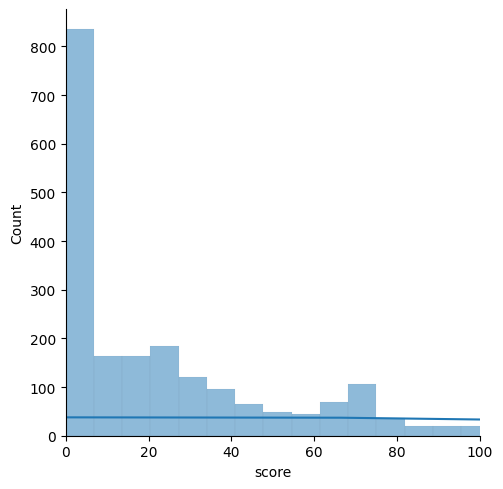

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(new_data.score, kde=True)

# Set x-axis limits
plt.xlim(0, 100)

In [40]:

pd.options.display.max_colwidth = 200

pd.DataFrame(df[df['label'] ==1])

,neg,neu,pos,compound,headline,label
0,0.000,0.816,0.184,0.5574,"We laugh at your ""giga"". For TSLA talk, and flotsam and jetsam not warranting its own post...",1
1,0.000,0.794,0.206,0.9531,"Come THROUGH for LATEST UPDATES and DISCUSSIONS freely over 20,000+ people [ ALL Share Due Diligence, and research everyday. Compared to other communities, we are friendly, respectful, and suppor...",1
2,0.000,0.746,0.254,0.7303,"What is the relationship between the CDR and the American stock?Is it a fractional share? If so, How many TSLA.ne shares make up 1 TSLA share?",1
3,0.088,0.797,0.115,0.9777,"For newer traders reading, I’ll preface this review with the caveat that this is not an easy trade and doesn’t have a particularly high win rate —SPY direction hasn’t formed, for one. Additionally...",1
6,0.124,0.618,0.258,0.3400,Fun chat. No comments constitute financial or investment advice. 🦅 🗽 🇺🇸 🎇[I want more chill](,1
...,...,...,...,...,...,...
2144,0.000,0.909,0.091,0.5106,# This is the daily fun thread/chat. 🥳🚀All topics are permitted in this thread.See our Monthly thread for more in-depth discussions about news/thoughts/opinions about Tesla.^((This thread should n...,1
2145,0.000,0.961,0.039,0.8655,"The mass market for battery electric vehicles is now set for the near future.In one corner is Fisker (FSR, ex-SPAQ):[Fisker, Foxconn Firm Up Plan For Sub-$30,000 EV, Target U.S. Production In 2023...",1
2147,0.038,0.856,0.106,0.9515,My TSLA predictions for the futureEOY 2021: $ 8002022: $10002025: $1500I think the second half of 2021 won't be too exiting but things should really start to pick up in 2022.I think we'll get a se...,1
2148,0.000,0.816,0.184,0.5574,"We laugh at your ""giga"". For TSLA talk, and flotsam and jetsam not warranting its own post...",1


In [110]:
'''includes US stock symbols with market cap > 100 Million, and price above $3. 
Download the csv file  https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq&letter=0&render=download 
of all the NYSE, NASDAQ and NYSEAMERICAN public traded companies.
'''
us = {
    'A', 'AA', 'AACQ', 'AAIC', 'AAL', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAWW', 'AAXN', 'AB', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCL', 'ABCM', 'ABEV', 'ABG', 'ABM', 'ABMD', 'ABNB', 'ABR', 'ABST', 'ABT', 'ABTX', 'ABUS', 'AC', 'ACA', 'ACAC', 'ACAD', 'ACAM', 'ACB', 'ACBI', 'ACC', 'ACCD', 'ACCO', 'ACEL', 'ACET', 'ACEV', 'ACGL', 'ACH', 'ACHC', 'ACI', 'ACIA', 'ACIC', 'ACIU', 'ACIW', 'ACLS', 'ACM', 'ACMR', 'ACN', 'ACNB', 'ACND', 'ACP', 'ACRE', 'ACRS', 'ACTC', 'ACTG', 'ACU', 'ACV', 'ADAP', 'ADBE', 'ADC', 'ADCT', 'ADES', 'ADI', 'ADM', 'ADMS', 'ADNT', 'ADOC', 'ADP', 'ADPT', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADUS', 'ADV', 'ADVM', 'ADX', 'AE', 'AEE', 'AEF', 'AEG', 'AEGN', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEP', 'AER', 'AERI', 'AES', 'AEYE', 'AFB', 'AFG', 'AFIB', 'AFIN', 'AFL', 'AFMD', 'AFT', 'AFYA', 'AG', 'AGC', 'AGCO', 'AGD', 'AGEN', 'AGI', 'AGIO', 'AGLE', 'AGM', 'AGMH', 'AGNC', 'AGO', 'AGR', 'AGRO', 'AGS', 'AGTC', 'AGX', 'AGYS', 'AHAC', 'AHCO', 'AHH', 'AI', 'AIF', 'AIG', 'AIH', 'AIMC', 'AIN', 'AINV', 'AIO', 'AIR', 'AIRC', 'AIRG', 'AIT', 'AIV', 'AIZ', 'AJAX', 'AJG', 'AJRD', 'AJX', 'AKAM', 'AKR', 'AKRO', 'AKTS', 'AKU', 'AKUS', 'AL', 'ALB', 'ALBO', 'ALC', 'ALCO', 'ALDX', 'ALE', 'ALEC', 'ALEX', 'ALG', 'ALGM', 'ALGN', 'ALGS', 'ALGT', 'ALK', 'ALKS', 'ALL', 'ALLE', 'ALLK', 'ALLO', 'ALLT', 'ALLY', 'ALNY', 'ALPN', 'ALRM', 'ALRS', 'ALSK', 'ALSN', 'ALT', 'ALTA', 'ALTG', 'ALTM', 'ALTR', 'ALUS', 'ALV', 'ALVR', 'ALX', 'ALXN', 'ALXO', 'AM', 'AMAL', 'AMAT', 'AMBA', 'AMBC', 'AMCI', 'AMCR', 'AMCX', 'AMD', 'AME', 'AMED', 'AMEH', 'AMG', 'AMGN', 'AMH', 'AMHC', 'AMK', 'AMKR', 'AMN', 'AMNB', 'AMOT', 'AMOV', 'AMP', 'AMPH', 'AMRC', 'AMRK', 'AMRN', 'AMRS', 'AMRX', 'AMSC', 'AMSF', 'AMSWA', 'AMT', 'AMTB', 'AMTBB', 'AMTI', 'AMWD', 'AMWL', 'AMX', 'AMYT', 'AMZN', 'AN', 'ANAB', 'ANAT', 'ANDE', 'ANET', 'ANF', 'ANGI', 'ANGO', 'ANIK', 'ANIP', 'ANNX', 'ANSS', 'ANTM', 'AOD', 'AON', 'AONE', 'AOS', 'AOSL', 'AOUT', 'AP', 'APA', 'APAM', 'APD', 'APEI', 'APG', 'APH', 'APHA', 'API', 'APLE', 'APLS', 'APLT', 'APO', 'APOG', 'APPF', 'APPN', 'APPS', 'APRE', 'APSG', 'APT', 'APTO', 'APTS', 'APTV', 'APTX', 'APVO', 'APXT', 'APYX', 'AQB', 'AQMS', 'AQN', 'AQST', 'AQUA', 'AR', 'ARA', 'ARAY', 'ARCB', 'ARCC', 'ARCE', 'ARCH', 'ARCO', 'ARCT', 'ARD', 'ARDC', 'ARDX', 'ARE', 'ARES', 'ARGO', 'ARGX', 'ARI', 'ARL', 'ARLO', 'ARLP', 'ARMK', 'ARNA', 'ARNC', 'AROC', 'AROW', 'ARQT', 'ARR', 'ARRY', 'ARTNA', 'ARVN', 'ARW', 'ARWR', 'ARYA', 'ASA', 'ASAN', 'ASAQ', 'ASB', 'ASC', 'ASG', 'ASGN', 'ASH', 'ASIX', 'ASLE', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPL', 'ASPN', 'ASPS', 'ASPU', 'ASR', 'ASTE', 'ASUR', 'ASX', 'ATAC', 'ATAX', 'ATCO', 'ATEC', 'ATEN', 'ATEX', 'ATGE', 'ATH', 'ATHA', 'ATHM', 'ATI', 'ATKR', 'ATLC', 'ATLO', 'ATNI', 'ATNM', 'ATNX', 'ATO', 'ATOM', 'ATR', 'ATRA', 'ATRC', 'ATRI', 'ATRO', 'ATRS', 'ATSG', 'ATTO', 'ATUS', 'ATVI', 'AU', 'AUB', 'AUBN', 'AUDC', 'AUPH', 'AUTL', 'AUY', 'AVA', 'AVAL', 'AVAN', 'AVAV', 'AVB', 'AVCT', 'AVD', 'AVDL', 'AVEO', 'AVGO', 'AVID', 'AVIR', 'AVK', 'AVLR', 'AVNS', 'AVNT', 'AVNW', 'AVO', 'AVRO', 'AVT', 'AVTR', 'AVXL', 'AVY', 'AVYA', 'AWF', 'AWH', 'AWI', 'AWK', 'AWP', 'AWR', 'AX', 'AXDX', 'AXGN', 'AXL', 'AXLA', 'AXNX', 'AXP', 'AXS', 'AXSM', 'AXTA', 'AXTI', 'AXU', 'AY', 'AYI', 'AYLA', 'AYRO', 'AYTU', 'AYX', 'AZEK', 'AZN', 'AZO', 'AZPN', 'AZRE', 'AZUL', 'AZYO', 'AZZ', 'B', 'BA', 'BABA', 'BAC', 'BAF', 'BAH', 'BAK', 'BALY', 'BAM', 'BANC', 'BAND', 'BANF', 'BANR', 'BANX', 'BAP', 'BASI', 'BATL', 'BATRA', 'BATRK', 'BAX', 'BB', 'BBAR', 'BBBY', 'BBCP', 'BBD', 'BBDC', 'BBDO', 'BBF', 'BBIO', 'BBK', 'BBL', 'BBN', 'BBSI', 'BBU', 'BBVA', 'BBY', 'BC', 'BCAB', 'BCAT', 'BCBP', 'BCC', 'BCE', 'BCEI', 'BCEL', 'BCH', 'BCLI', 'BCML', 'BCO', 'BCOR', 'BCOV', 'BCPC', 'BCRX', 'BCS', 'BCSF', 'BCTG', 'BCV', 'BCX', 'BCYC', 'BDC', 'BDGE', 'BDJ', 'BDN', 'BDSI', 'BDSX', 'BDTX', 'BDX', 'BE', 'BEAM', 'BEAT', 'BECN', 'BEDU', 'BEEM', 'BEKE', 'BELFA', 'BELFB', 'BEN', 'BEP', 'BEPC', 'BERY', 'BFAM', 'BFC', 'BFI', 'BFIN', 'BFK', 'BFRA', 'BFS', 'BFST', 'BFT', 'BFZ', 'BG', 'BGB', 'BGCP', 'BGFV', 'BGH', 'BGIO', 'BGNE', 'BGR', 'BGS', 'BGSF', 'BGT', 'BGX', 'BGY', 'BH', 'BHB', 'BHC', 'BHE', 'BHF', 'BHK', 'BHLB', 'BHP', 'BHR', 'BHVN', 'BIDU', 'BIF', 'BIG', 'BIGC', 'BIIB', 'BILI', 'BILL', 'BIO', 'BIOX', 'BIP', 'BIPC', 'BIT', 'BIVI', 'BJ', 'BJRI', 'BK', 'BKD', 'BKE', 'BKH', 'BKI', 'BKN', 'BKNG', 'BKR', 'BKT', 'BKU', 'BL', 'BLBD', 'BLCT', 'BLD', 'BLDP', 'BLDR', 'BLE', 'BLFS', 'BLI', 'BLK', 'BLKB', 'BLL', 'BLMN', 'BLNK', 'BLSA', 'BLU', 'BLUE', 'BLW', 'BLX', 'BMA', 'BMCH', 'BME', 'BMI', 'BMO', 'BMRC', 'BMRN', 'BMTC', 'BMY', 'BNED', 'BNFT', 'BNGO', 'BNL', 'BNR', 'BNS', 'BNTX', 'BNY', 'BOAC', 'BOCH', 'BOE', 'BOH', 'BOKF', 'BOMN', 'BOOM', 'BOOT', 'BOWX', 'BOX', 'BP', 'BPFH', 'BPMC', 'BPMP', 'BPOP', 'BPRN', 'BPY', 'BPYU', 'BQ', 'BR', 'BRBR', 'BRBS', 'BRC', 'BREZ', 'BRFS', 'BRG', 'BRID', 'BRKL', 'BRKR', 'BRKS', 'BRMK', 'BRO', 'BROG', 'BRP', 'BRT', 'BRX', 'BRY', 'BSAC', 'BSBK', 'BSBR', 'BSD', 'BSET', 'BSGM', 'BSIG', 'BSL', 'BSM', 'BSMX', 'BSRR', 'BST', 'BSTZ', 'BSVN', 'BSX', 'BSY', 'BTA', 'BTAI', 'BTAQ', 'BTAQU', 'BTBT', 'BTG', 'BTI', 'BTO', 'BTT', 'BTWN', 'BTZ', 'BUD', 'BUFF', 'BUI', 'BUR', 'BURL', 'BUSE', 'BV', 'BVH', 'BVN', 'BW', 'BWA', 'BWB', 'BWEN', 'BWFG', 'BWG', 'BWMX', 'BWXT', 'BX', 'BXC', 'BXG', 'BXMT', 'BXMX', 'BXP', 'BXS', 'BY', 'BYD', 'BYM', 'BYND', 'BYSI', 'BZH', 'BZUN', 'C', 'CAAP', 'CAAS', 'CABA', 'CABO', 'CAC', 'CACC', 'CACI', 'CADE', 'CAE', 'CAF', 'CAG', 'CAH', 'CAI', 'CAJ', 'CAKE', 'CAL', 'CALA', 'CALB', 'CALM', 'CALT', 'CALX', 'CAMP', 'CAMT', 'CAN', 'CANG', 'CAPA', 'CAPL', 'CAR', 'CARA', 'CARE', 'CARG', 'CARR', 'CARS', 'CASA', 'CASH', 'CASS', 'CASY', 'CAT', 'CATC', 'CATM', 'CATO', 'CATY', 'CB', 'CBAN', 'CBAT', 'CBAY', 'CBB', 'CBD', 'CBFV', 'CBH', 'CBIO', 'CBMG', 'CBNK', 'CBOE', 'CBPO', 'CBRE', 'CBRL', 'CBSH', 'CBT', 'CBTX', 'CBU', 'CBZ', 'CC', 'CCAC', 'CCAP', 'CCB', 'CCBG', 'CCC', 'CCCC', 'CCD', 'CCEP', 'CCF', 'CCI', 'CCIV', 'CCJ', 'CCK', 'CCL', 'CCMP', 'CCNE', 'CCOI', 'CCRN', 'CCS', 'CCU', 'CCX', 'CCXI', 'CD', 'CDAK', 'CDAY', 'CDE', 'CDK', 'CDLX', 'CDMO', 'CDNA', 'CDNS', 'CDR', 'CDW', 'CDXC', 'CDXS', 'CDZI', 'CE', 'CEA', 'CECE', 'CEE', 'CEIX', 'CEL', 'CELH', 'CEM', 'CENT', 'CENTA', 'CENX', 'CEO', 'CEQP', 'CERE', 'CERN', 'CERS', 'CERT', 'CET', 'CEVA', 'CF', 'CFB', 'CFBK', 'CFFI', 'CFFN', 'CFG', 'CFII', 'CFR', 'CFRX', 'CFX', 'CG', 'CGBD', 'CGC', 'CGEN', 'CGNX', 'CGO', 'CGRO', 'CHA', 'CHAQ', 'CHCO', 'CHCT', 'CHD', 'CHDN', 'CHE', 'CHEF', 'CHGG', 'CHH', 'CHI', 'CHKP', 'CHL', 'CHMA', 'CHMG', 'CHMI', 'CHN', 'CHNG', 'CHPM', 'CHRS', 'CHRW', 'CHT', 'CHTR', 'CHU', 'CHUY', 'CHW', 'CHWY', 'CHX', 'CHY', 'CI', 'CIA', 'CIB', 'CIEN', 'CIGI', 'CII', 'CIIC', 'CIK', 'CIM', 'CINF', 'CINR', 'CIO', 'CIR', 'CIT', 'CIVB', 'CIX', 'CIXX', 'CIZN', 'CKH', 'CL', 'CLA', 'CLAR', 'CLB', 'CLBK', 'CLCT', 'CLDR', 'CLDT', 'CLDX', 'CLF', 'CLFD', 'CLGX', 'CLH', 'CLI', 'CLII', 'CLLS', 'CLM', 'CLMT', 'CLNC', 'CLNE', 'CLNY', 'CLPR', 'CLPT', 'CLR', 'CLS', 'CLSK', 'CLVR', 'CLVS', 'CLW', 'CLX', 'CLXT', 'CM', 'CMA', 'CMBM', 'CMC', 'CMCL', 'CMCO', 'CMCSA', 'CMCT', 'CMD', 'CME', 'CMG', 'CMI', 'CMLF', 'CMLS', 'CMO', 'CMP', 'CMPI', 'CMPR', 'CMPS', 'CMRE', 'CMRX', 'CMS', 'CMT', 'CMTL', 'CMU', 'CNA', 'CNBKA', 'CNC', 'CNCE', 'CNDT', 'CNF', 'CNHI', 'CNI', 'CNK', 'CNMD', 'CNNE', 'CNO', 'CNOB', 'CNP', 'CNQ', 'CNR', 'CNS', 'CNSL', 'CNST', 'CNTG', 'CNTY', 'CNX', 'CNXC', 'CNXN', 'CO', 'CODI', 'CODX', 'COE', 'COF', 'COFS', 'COG', 'COGT', 'COHR', 'COHU', 'COKE', 'COLB', 'COLD', 'COLL', 'COLM', 'COMM', 'CONE', 'CONN', 'COO', 'COOP', 'COP', 'COR', 'CORE', 'CORT', 'COST', 'COTY', 'COUP', 'COWN', 'CP', 'CPA', 'CPAC', 'CPB', 'CPE', 'CPF', 'CPK', 'CPLG', 'CPLP', 'CPRI', 'CPRT', 'CPRX', 'CPS', 'CPSI', 'CPSR', 'CPST', 'CPT', 'CQP', 'CR', 'CRAI', 'CRC', 'CRDF', 'CREE', 'CRESY', 'CRF', 'CRH', 'CRHC', 'CRI', 'CRIS', 'CRK', 'CRL', 'CRM', 'CRMD', 'CRMT', 'CRNC', 'CRNX', 'CRON', 'CROX', 'CRS', 'CRSA', 'CRSP', 'CRSR', 'CRTO', 'CRTX', 'CRUS', 'CRVL', 'CRWD', 'CRY', 'CS', 'CSBR', 'CSCO', 'CSGP', 'CSGS', 'CSII', 'CSIQ', 'CSL', 'CSOD', 'CSPR', 'CSQ', 'CSR', 'CSSE', 'CSTE', 'CSTL', 'CSTM', 'CSTR', 'CSV', 'CSWC', 'CSWI', 'CSX', 'CTAC', 'CTAS', 'CTB', 'CTBI', 'CTIC', 'CTLT', 'CTMX', 'CTO', 'CTR', 'CTRA', 'CTRE', 'CTRN', 'CTS', 'CTSH', 'CTSO', 'CTT', 'CTVA', 'CTXS', 'CUB', 'CUBE', 'CUBI', 'CUE', 'CUK', 'CULP', 'CURI', 'CURO', 'CUTR', 'CUZ', 'CVA', 'CVAC', 'CVBF', 'CVCO', 'CVCY', 'CVE', 'CVEO', 'CVET', 'CVGI', 'CVGW', 'CVI', 'CVLB', 'CVLG', 'CVLT', 'CVLY', 'CVM', 'CVNA', 'CVS', 'CVX', 'CW', 'CWCO', 'CWEN', 'CWH', 'CWK', 'CWST', 'CWT', 'CX', 'CXDO', 'CXE', 'CXO', 'CXP', 'CXW', 'CYAD', 'CYBE', 'CYBR', 'CYCN', 'CYD', 'CYH', 'CYRX', 'CYTK', 'CZNC', 'CZR', 'CZWI', 'CZZ', 'D', 'DAC', 'DADA', 'DAKT', 'DAL', 'DAN', 'DAO', 'DAR', 'DASH', 'DAVA', 'DB', 'DBD', 'DBDR', 'DBI', 'DBL', 'DBX', 'DCBO', 'DCF', 'DCI', 'DCO', 'DCOM', 'DCP', 'DCPH', 'DCRB', 'DCT', 'DCTH', 'DD', 'DDD', 'DDOG', 'DDS', 'DE', 'DEA', 'DECK', 'DEH', 'DEI', 'DELL', 'DEN', 'DENN', 'DEO', 'DESP', 'DEX', 'DFHT', 'DFIN', 'DFNS', 'DFP', 'DFPH', 'DFS', 'DG', 'DGICA', 'DGICB', 'DGII', 'DGNR', 'DGNS', 'DGX', 'DHC', 'DHF', 'DHI', 'DHIL', 'DHR', 'DHT', 'DIAX', 'DIN', 'DIOD', 'DIS', 'DISCA', 'DISCB', 'DISCK', 'DISH', 'DJCO', 'DK', 'DKL', 'DKNG', 'DKS', 'DL', 'DLA', 'DLB', 'DLHC', 'DLR', 'DLTH', 'DLTR', 'DLX', 'DM', 'DMAC', 'DMB', 'DMF', 'DMLP', 'DMO', 'DMRC', 'DMS', 'DMTK', 'DMYD', 'DNB', 'DNLI', 'DNOW', 'DNP', 'DOC', 'DOCU', 'DOMO', 'DOOO', 'DOOR', 'DORM', 'DOV', 'DOW', 'DOX', 'DOYU', 'DPG', 'DPZ', 'DQ', 'DRD', 'DRE', 'DRH', 'DRI', 'DRIO', 'DRNA', 'DRQ', 'DSAC', 'DSGX', 'DSKE', 'DSL', 'DSM', 'DSPG', 'DSSI', 'DSU', 'DT', 'DTE', 'DTF', 'DTIL', 'DUC', 'DUK', 'DUO', 'DVA', 'DVAX', 'DVN', 'DX', 'DXC', 'DXCM', 'DXPE', 'DY', 'DYAI', 'DYN', 'DZSI', 'E', 'EA', 'EAD', 'EAF', 'EAR', 'EARN', 'EAT', 'EB', 'EBAY', 'EBC', 'EBF', 'EBIX', 'EBMT', 'EBON', 'EBR', 'EBS', 'EBSB', 'EBTC', 'EC', 'ECC', 'ECF', 'ECHO', 'ECL', 'ECOL', 'ECOM', 'ECPG', 'ED', 'EDAP', 'EDD', 'EDF', 'EDIT', 'EDN', 'EDU', 'EDUC', 'EEFT', 'EEX', 'EFC', 'EFF', 'EFL', 'EFR', 'EFSC', 'EFT', 'EFX', 'EGAN', 'EGBN', 'EGHT', 'EGLE', 'EGO', 'EGOV', 'EGP', 'EGRX', 'EH', 'EHC', 'EHI', 'EHT', 'EHTH', 'EIDX', 'EIG', 'EIGI', 'EIGR', 'EIM', 'EIX', 'EL', 'ELA', 'ELAN', 'ELF', 'ELLO', 'ELOX', 'ELP', 'ELS', 'ELVT', 'ELY', 'EMD', 'EME', 'EMF', 'EMKR', 'EML', 'EMN', 'EMO', 'EMPW', 'EMR', 'EMX', 'ENB', 'ENBL', 'ENDP', 'ENIA', 'ENIC', 'ENLC', 'ENLV', 'ENPC', 'ENPH', 'ENR', 'ENS', 'ENSG', 'ENTA', 'ENTG', 'ENV', 'ENVA', 'ENX', 'EOD', 'EOG', 'EOI', 'EOLS', 'EOS', 'EOSE', 'EOT', 'EPAC', 'EPAM', 'EPAY', 'EPC', 'EPD', 'EPIX', 'EPR', 'EPRT', 'EPZM', 'EQ', 'EQBK', 'EQC', 'EQD', 'EQH', 'EQIX', 'EQNR', 'EQOS', 'EQR', 'EQT', 'EQX', 'ERC', 'ERES', 'ERF', 'ERH', 'ERIC', 'ERIE', 'ERII', 'ERJ', 'ERYP', 'ES', 'ESCA', 'ESE', 'ESGR', 'ESI', 'ESLT', 'ESNT', 'ESPR', 'ESQ', 'ESRT', 'ESS', 'ESSA', 'ESSC', 'ESTA', 'ESTC', 'ESTE', 'ESXB', 'ET', 'ETAC', 'ETB', 'ETG', 'ETH', 'ETJ', 'ETN', 'ETNB', 'ETO', 'ETON', 'ETR', 'ETRN', 'ETSY', 'ETV', 'ETW', 'ETX', 'ETY', 'EURN', 'EV', 'EVA', 'EVBG', 'EVBN', 'EVER', 'EVF', 'EVG', 'EVGN', 'EVH', 'EVI', 'EVLO', 'EVM', 'EVN', 'EVOP', 'EVR', 'EVRG', 'EVRI', 'EVT', 'EVTC', 'EVV', 'EW', 'EWBC', 'EXAS', 'EXC', 'EXEL', 'EXFO', 'EXG', 'EXK', 'EXLS', 'EXP', 'EXPC', 'EXPD', 'EXPE', 'EXPI', 'EXPO', 'EXR', 'EXTN', 'EXTR', 'EYE', 'EYEN', 'EZPW', 'F', 'FAF', 'FAII', 'FAM', 'FANG', 'FANH', 'FARO', 'FAST', 'FATE', 'FAX', 'FB', 'FBC', 'FBHS', 'FBIO', 'FBIZ', 'FBK', 'FBM', 'FBMS', 'FBNC', 'FBP', 'FBRX', 'FC', 'FCAC', 'FCAP', 'FCAU', 'FCBC', 'FCBP', 'FCCO', 'FCCY', 'FCEL', 'FCF', 'FCFS', 'FCN', 'FCNCA', 'FCPT', 'FCRD', 'FCT', 'FCX', 'FDBC', 'FDEU', 'FDMT', 'FDP', 'FDS', 'FDUS', 'FDX', 'FE', 'FEI', 'FEIM', 'FELE', 'FEN', 'FENC', 'FEYE', 'FF', 'FFA', 'FFBC', 'FFC', 'FFG', 'FFIC', 'FFIN', 'FFIV', 'FFNW', 'FFWM', 'FGBI', 'FGEN', 'FHB', 'FHI', 'FHN', 'FHTX', 'FIBK', 'FICO', 'FIF', 'FIII', 'FINS', 'FIS', 'FISI', 'FISV', 'FIT', 'FITB', 'FIV', 'FIVE', 'FIVN', 'FIX', 'FIXX', 'FIZZ', 'FL', 'FLC', 'FLDM', 'FLEX', 'FLGT', 'FLIC', 'FLIR', 'FLL', 'FLMN', 'FLNG', 'FLNT', 'FLO', 'FLOW', 'FLR', 'FLS', 'FLT', 'FLUX', 'FLWS', 'FLXN', 'FLXS', 'FLY', 'FMAC', 'FMAO', 'FMBH', 'FMBI', 'FMC', 'FMN', 'FMNB', 'FMS', 'FMTX', 'FMX', 'FN', 'FNB', 'FNCB', 'FND', 'FNF', 'FNKO', 'FNLC', 'FNV', 'FNWB', 'FOCS', 'FOE', 'FOF', 'FOLD', 'FONR', 'FOR', 'FORM', 'FORR', 'FORTY', 'FOSL', 'FOUR', 'FOX', 'FOXA', 'FOXF', 'FPF', 'FPH', 'FPI', 'FPL', 'FPRX', 'FR', 'FRA', 'FRAF', 'FRBA', 'FRC', 'FREE', 'FREQ', 'FRG', 'FRGI', 'FRHC', 'FRLN', 'FRME', 'FRO', 'FROG', 'FRPH', 'FRPT', 'FRSX', 'FRT', 'FRTA', 'FSBW', 'FSD', 'FSDC', 'FSFG', 'FSK', 'FSKR', 'FSLF', 'FSLR', 'FSLY', 'FSM', 'FSP', 'FSR', 'FSRV', 'FSS', 'FST', 'FSTR', 'FSV', 'FT', 'FTAI', 'FTCH', 'FTDR', 'FTF', 'FTHM', 'FTI', 'FTIV', 'FTNT', 'FTOC', 'FTS', 'FTSI', 'FTV', 'FUBO', 'FUL', 'FULC', 'FULT', 'FUN', 'FUNC', 'FUND', 'FUSE', 'FUSN', 'FUTU', 'FUV', 'FVAM', 'FVCB', 'FVE', 'FVRR', 'FWONA', 'FWONK', 'FWRD', 'G', 'GAB', 'GABC', 'GAIA', 'GAIN', 'GAM', 'GAN', 'GATO', 'GATX', 'GB', 'GBAB', 'GBCI', 'GBDC', 'GBIO', 'GBL', 'GBLI', 'GBT', 'GBX', 'GCBC', 'GCI', 'GCMG', 'GCO', 'GCP', 'GCV', 'GD', 'GDDY', 'GDEN', 'GDL', 'GDO', 'GDOT', 'GDP', 'GDRX', 'GDS', 'GDV', 'GDYN', 'GE', 'GEF', 'GEL', 'GENC', 'GEO', 'GEOS', 'GES', 'GEVO', 'GF', 'GFF', 'GFI', 'GFL', 'GFN', 'GGAL', 'GGB', 'GGG', 'GGM', 'GGN', 'GGT', 'GGZ', 'GH', 'GHC', 'GHG', 'GHIV', 'GHL', 'GHLD', 'GHM', 'GHY', 'GIB', 'GIII', 'GIK', 'GIL', 'GILD', 'GILT', 'GIM', 'GIS', 'GIX', 'GKOS', 'GL', 'GLAD', 'GLDD', 'GLEO', 'GLNG', 'GLO', 'GLOB', 'GLOG', 'GLP', 'GLPG', 'GLPI', 'GLQ', 'GLRE', 'GLSI', 'GLT', 'GLTO', 'GLUU', 'GLW', 'GLYC', 'GM', 'GMAB', 'GMDA', 'GME', 'GMED', 'GMRE', 'GMS', 'GNE', 'GNFT', 'GNK', 'GNL', 'GNLN', 'GNMK', 'GNPX', 'GNRC', 'GNRS', 'GNSS', 'GNT', 'GNTX', 'GNTY', 'GNW', 'GO', 'GOAC', 'GOCO', 'GOEV', 'GOF', 'GOGL', 'GOGO', 'GOL', 'GOLD', 'GOLF', 'GOOD', 'GOOG', 'GOOGL', 'GOOS', 'GOSS', 'GP', 'GPC', 'GPI', 'GPK', 'GPM', 'GPMT', 'GPN', 'GPP', 'GPRE', 'GPRK', 'GPRO', 'GPS', 'GPX', 'GRA', 'GRAY', 'GRBK', 'GRC', 'GRFS', 'GRIF', 'GRMN', 'GRPN', 'GRSV', 'GRTS', 'GRTX', 'GRUB', 'GRVY', 'GRWG', 'GRX', 'GS', 'GSAH', 'GSBC', 'GSBD', 'GSHD', 'GSIT', 'GSK', 'GSKY', 'GSL', 'GSS', 'GSX', 'GT', 'GTES', 'GTH', 'GTHX', 'GTLS', 'GTN', 'GTS', 'GTT', 'GTY', 'GTYH', 'GUT', 'GVA', 'GWAC', 'GWB', 'GWGH', 'GWPH', 'GWRE', 'GWRS', 'GWW', 'GXGX', 'H', 'HA', 'HAE', 'HAFC', 'HAIN', 'HAL', 'HALO', 'HARP', 'HAS', 'HASI', 'HAYN', 'HBAN', 'HBB', 'HBCP', 'HBI', 'HBIO', 'HBM', 'HBMD', 'HBNC', 'HBT', 'HCA', 'HCAT', 'HCC', 'HCCI', 'HCHC', 'HCI', 'HCKT', 'HCM', 'HCSG', 'HD', 'HDB', 'HE', 'HEAR', 'HEC', 'HEES', 'HEI', 'HELE', 'HEP', 'HEQ', 'HES', 'HESM', 'HEXO', 'HFC', 'HFFG', 'HFRO', 'HFWA', 'HGEN', 'HGLB', 'HGV', 'HHC', 'HHR', 'HI', 'HIBB', 'HIE', 'HIFS', 'HIG', 'HII', 'HIMX', 'HIO', 'HIW', 'HIX', 'HKIB', 'HL', 'HLF', 'HLG', 'HLI', 'HLIO', 'HLIT', 'HLNE', 'HLT', 'HLX', 'HLXA', 'HMC', 'HMHC', 'HMI', 'HMLP', 'HMN', 'HMST', 'HMSY', 'HMTV', 'HMY', 'HNGR', 'HNI', 'HNP', 'HNW', 'HOFT', 'HOG', 'HOL', 'HOLI', 'HOLX', 'HOMB', 'HOME', 'HON', 'HONE', 'HOOK', 'HOPE', 'HOV', 'HP', 'HPE', 'HPF', 'HPI', 'HPK', 'HPP', 'HPQ', 'HPS', 'HPX', 'HQH', 'HQI', 'HQL', 'HQY', 'HR', 'HRB', 'HRC', 'HRI', 'HRL', 'HRMY', 'HROW', 'HRTG', 'HRTX', 'HRZN', 'HSAQ', 'HSBC', 'HSC', 'HSIC', 'HSII', 'HSKA', 'HST', 'HSTM', 'HSY', 'HT', 'HTA', 'HTBI', 'HTBK', 'HTBX', 'HTD', 'HTGC', 'HTH', 'HTHT', 'HTLD', 'HTLF', 'HTOO', 'HUBB', 'HUBG', 'HUBS', 'HUIZ', 'HUM', 'HUN', 'HURC', 'HURN', 'HUYA', 'HVT', 'HWBK', 'HWC', 'HWKN', 'HWM', 'HXL', 'HY', 'HYB', 'HYFM', 'HYI', 'HYLN', 'HYMC', 'HYRE', 'HYT', 'HZAC', 'HZN', 'HZNP', 'HZO', 'HZON', 'IAA', 'IAC', 'IACA', 'IAE', 'IAF', 'IAG', 'IART', 'IBA', 'IBCP', 'IBEX', 'IBKR', 'IBM', 'IBN', 'IBOC', 'IBP', 'IBTX', 'ICAD', 'ICBK', 'ICE', 'ICFI', 'ICHR', 'ICL', 'ICLK', 'ICLR', 'ICPT', 'ICUI', 'IDA', 'IDCC', 'IDE', 'IDN', 'IDRA', 'IDT', 'IDXX', 'IDYA', 'IEA', 'IEC', 'IEP', 'IESC', 'IEX', 'IFF', 'IFN', 'IFRX', 'IFS', 'IGA', 'IGAC', 'IGD', 'IGI', 'IGIC', 'IGMS', 'IGR', 'IGT', 'IH', 'IHC', 'IHD', 'IHG', 'IHIT', 'IHRT', 'IIF', 'III', 'IIIN', 'IIIV', 'IIM', 'IIN', 'IIPR', 'IIVI', 'ILMN', 'ILPT', 'IMAB', 'IMAX', 'IMGN', 'IMKTA', 'IMMP', 'IMMR', 'IMNM', 'IMO', 'IMOS', 'IMPX', 'IMRA', 'IMTX', 'IMUX', 'IMV', 'IMVT', 'IMXI', 'INAQ', 'INBK', 'INBX', 'INCY', 'INDB', 'INFN', 'INFO', 'INFU', 'INFY', 'ING', 'INGN', 'INGR', 'INMB', 'INMD', 'INN', 'INO', 'INOD', 'INOV', 'INS', 'INSE', 'INSG', 'INSI', 'INSM', 'INSP', 'INSW', 'INT', 'INTC', 'INTU', 'INTZ', 'INVA', 'INVE', 'INVH', 'INZY', 'IONS', 'IOSP', 'IOVA', 'IP', 'IPA', 'IPAR', 'IPG', 'IPGP', 'IPHA', 'IPHI', 'IPI', 'IPOC', 'IPOD', 'IPOE', 'IPOF', 'IPV', 'IQ', 'IQI', 'IQV', 'IR', 'IRBT', 'IRCP', 'IRDM', 'IRM', 'IRMD', 'IRS', 'IRT', 'IRTC', 'IRWD', 'ISBC', 'ISD', 'ISEE', 'ISRG', 'ISSC', 'ISTR', 'IT', 'ITCB', 'ITCI', 'ITGR', 'ITI', 'ITIC', 'ITMR', 'ITOS', 'ITRG', 'ITRI', 'ITRN', 'ITT', 'ITUB', 'ITW', 'IVA', 'IVAC', 'IVC', 'IVH', 'IVR', 'IVZ', 'IX', 'J', 'JACK', 'JAMF', 'JAX', 'JAZZ', 'JBGS', 'JBHT', 'JBL', 'JBLU', 'JBSS', 'JBT', 'JCE', 'JCI', 'JCO', 'JCOM', 'JD', 'JDD', 'JE', 'JEF', 'JELD', 'JEMD', 'JEQ', 'JFIN', 'JFR', 'JG', 'JGH', 'JHB', 'JHG', 'JHI', 'JHS', 'JHX', 'JIH', 'JJSF', 'JKHY', 'JKS', 'JLL', 'JLS', 'JMIA', 'JNCE', 'JNJ', 'JNPR', 'JOBS', 'JOE', 'JOF', 'JOUT', 'JPC', 'JPI', 'JPM', 'JPS', 'JPT', 'JQC', 'JRI', 'JRO', 'JRS', 'JRVR', 'JSD', 'JTA', 'JTD', 'JWN', 'JWS', 'JYAC', 'JYNT', 'K', 'KAI', 'KALA', 'KALU', 'KALV', 'KAMN', 'KAR', 'KB', 'KBAL', 'KBH', 'KBR', 'KC', 'KDMN', 'KDNY', 'KDP', 'KE', 'KELYA', 'KELYB', 'KEN', 'KEP', 'KEX', 'KEY', 'KEYS', 'KF', 'KFRC', 'KFS', 'KFY', 'KGC', 'KHC', 'KIDS', 'KIM', 'KIN', 'KIO', 'KIRK', 'KKR', 'KL', 'KLAC', 'KLDO', 'KLIC', 'KLR', 'KMB', 'KMDA', 'KMF', 'KMI', 'KMPR', 'KMT', 'KMX', 'KN', 'KNDI', 'KNL', 'KNOP', 'KNSA', 'KNSL', 'KNTE', 'KNX', 'KO', 'KOD', 'KODK', 'KOF', 'KOP', 'KPTI', 'KR', 'KRA', 'KRC', 'KREF', 'KRG', 'KRMD', 'KRNT', 'KRNY', 'KRO', 'KRON', 'KROS', 'KRP', 'KRTX', 'KRUS', 'KRYS', 'KSM', 'KSMT', 'KSS', 'KSU', 'KT', 'KTB', 'KTF', 'KTOS', 'KURA', 'KVHI', 'KW', 'KWR', 'KXIN', 'KYMR', 'KYN', 'KZR', 'L', 'LAC', 'LAD', 'LADR', 'LAKE', 'LAMR', 'LANC', 'LAND', 'LARK', 'LASR', 'LATN', 'LAUR', 'LAWS', 'LAZ', 'LAZR', 'LAZY', 'LB', 'LBAI', 'LBC', 'LBRDA', 'LBRDK', 'LBRT', 'LBTYA', 'LBTYB', 'LBTYK', 'LC', 'LCAP', 'LCI', 'LCII', 'LCNB', 'LCUT', 'LCY', 'LDL', 'LDOS', 'LDP', 'LE', 'LEA', 'LEAF', 'LEAP', 'LECO', 'LEG', 'LEGH', 'LEGN', 'LEN', 'LEO', 'LESL', 'LEU', 'LEVI', 'LEVL', 'LFAC', 'LFC', 'LFTR', 'LFUS', 'LFVN', 'LGI', 'LGIH', 'LGND', 'LGVW', 'LH', 'LHCG', 'LHX', 'LI', 'LII', 'LILA', 'LILAK', 'LIN', 'LINC', 'LIND', 'LINX', 'LIQT', 'LITE', 'LIVK', 'LIVN', 'LIVX', 'LIZI', 'LJPC', 'LKFN', 'LKQ', 'LL', 'LLNW', 'LLY', 'LMAT', 'LMND', 'LMNL', 'LMNR', 'LMNX', 'LMPX', 'LMRK', 'LMT', 'LNC', 'LND', 'LNDC', 'LNG', 'LNN', 'LNT', 'LNTH', 'LOB', 'LOCO', 'LOGC', 'LOGI', 'LOMA', 'LOOP', 'LOPE', 'LORL', 'LOV', 'LOVE', 'LOW', 'LPG', 'LPI', 'LPL', 'LPLA', 'LPRO', 'LPSN', 'LPTH', 'LPX', 'LQDT', 'LRCX', 'LRMR', 'LRN', 'LSAQ', 'LSCC', 'LSF', 'LSI', 'LSPD', 'LSTR', 'LSXMA', 'LSXMB', 'LSXMK', 'LTC', 'LTHM', 'LTRN', 'LTRPA', 'LTRPB', 'LTRX', 'LU', 'LULU', 'LUMN', 'LUMO', 'LUNA', 'LUNG', 'LUV', 'LUXA', 'LVS', 'LW', 'LX', 'LXEH', 'LXFR', 'LXP', 'LXRX', 'LYB', 'LYFT', 'LYRA', 'LYTS', 'LYV', 'LZB', 'M', 'MA', 'MAA', 'MAC', 'MACU', 'MAG', 'MAIN', 'MAN', 'MANH', 'MANT', 'MANU', 'MAR', 'MARA', 'MAS', 'MASI', 'MASS', 'MAT', 'MATW', 'MATX', 'MAV', 'MAX', 'MAXN', 'MAXR', 'MBCN', 'MBI', 'MBIN', 'MBIO', 'MBT', 'MBUU', 'MBWM', 'MC', 'MCA', 'MCB', 'MCBC', 'MCBS', 'MCD', 'MCFE', 'MCFT', 'MCHP', 'MCI', 'MCK', 'MCMJ', 'MCN', 'MCO', 'MCR', 'MCRB', 'MCRI', 'MCS', 'MCY', 'MD', 'MDB', 'MDC', 'MDGL', 'MDLA', 'MDLZ', 'MDNA', 'MDP', 'MDRX', 'MDT', 'MDU', 'MDVL', 'MDWD', 'MDWT', 'MDXG', 'MEC', 'MED', 'MEDP', 'MEG', 'MEI', 'MELI', 'MEN', 'MEOH', 'MERC', 'MESA', 'MESO', 'MET', 'MFA', 'MFC', 'MFGP', 'MFIN', 'MFL', 'MFM', 'MFNC', 'MFT', 'MG', 'MGA', 'MGEE', 'MGF', 'MGI', 'MGIC', 'MGLN', 'MGM', 'MGNI', 'MGNX', 'MGP', 'MGPI', 'MGRC', 'MGTA', 'MGTX', 'MGU', 'MGY', 'MHD', 'MHF', 'MHH', 'MHI', 'MHK', 'MHN', 'MHO', 'MIC', 'MIDD', 'MIG', 'MIK', 'MIME', 'MIN', 'MIRM', 'MIST', 'MITK', 'MIXT', 'MIY', 'MKC', 'MKL', 'MKSI', 'MKTX', 'MLAB', 'MLAC', 'MLCO', 'MLHR', 'MLI', 'MLM', 'MLP', 'MLR', 'MLVF', 'MMAC', 'MMC', 'MMD', 'MMI', 'MMM', 'MMP', 'MMS', 'MMSI', 'MMT', 'MMU', 'MMX', 'MMYT', 'MN', 'MNKD', 'MNOV', 'MNP', 'MNR', 'MNRL', 'MNRO', 'MNSB', 'MNSO', 'MNST', 'MNTX', 'MO', 'MOD', 'MODN', 'MOFG', 'MOGO', 'MOH', 'MOMO', 'MOR', 'MORF', 'MORN', 'MOS', 'MOTN', 'MOV', 'MP', 'MPA', 'MPAA', 'MPB', 'MPC', 'MPLN', 'MPLX', 'MPV', 'MPW', 'MPWR', 'MPX', 'MQT', 'MQY', 'MRBK', 'MRC', 'MRCC', 'MRCY', 'MREO', 'MRK', 'MRLN', 'MRNA', 'MRNS', 'MRO', 'MRSN', 'MRTN', 'MRTX', 'MRUS', 'MRVI', 'MRVL', 'MS', 'MSA', 'MSB', 'MSBI', 'MSC', 'MSCI', 'MSD', 'MSEX', 'MSFT', 'MSGE', 'MSGN', 'MSGS', 'MSI', 'MSM', 'MSON', 'MSP', 'MSTR', 'MT', 'MTA', 'MTB', 'MTBC', 'MTCH', 'MTCR', 'MTD', 'MTDR', 'MTEM', 'MTG', 'MTH', 'MTLS', 'MTN', 'MTOR', 'MTRN', 'MTRX', 'MTSC', 'MTSI', 'MTT', 'MTW', 'MTX', 'MTZ', 'MU', 'MUA', 'MUC', 'MUE', 'MUFG', 'MUH', 'MUI', 'MUJ', 'MUR', 'MUS', 'MUSA', 'MVBF', 'MVF', 'MVIS', 'MVT', 'MWA', 'MWK', 'MX', 'MXF', 'MXIM', 'MXL', 'MYC', 'MYD', 'MYE', 'MYF', 'MYFW', 'MYGN', 'MYI', 'MYJ', 'MYN', 'MYOV', 'MYRG', 'NAC', 'NAD', 'NAN', 'NARI', 'NATH', 'NATI', 'NATR', 'NAV', 'NAVI', 'NAZ', 'NBA', 'NBAC', 'NBB', 'NBH', 'NBHC', 'NBIX', 'NBLX', 'NBN', 'NBR', 'NBSE', 'NBTB', 'NBTX', 'NC', 'NCA', 'NCBS', 'NCLH', 'NCMI', 'NCNA', 'NCNO', 'NCR', 'NCV', 'NCZ', 'NDAQ', 'NDLS', 'NDSN', 'NEA', 'NEE', 'NEM', 'NEN', 'NEO', 'NEOG', 'NEP', 'NESR', 'NET', 'NEU', 'NEV', 'NEW', 'NEWR', 'NEWT', 'NEX', 'NEXA', 'NFBK', 'NFE', 'NFG', 'NFH', 'NFJ', 'NFLX', 'NG', 'NGA', 'NGG', 'NGHC', 'NGM', 'NGMS', 'NGS', 'NGVC', 'NGVT', 'NH', 'NHC', 'NHF', 'NHI', 'NHIC', 'NHS', 'NI', 'NICE', 'NID', 'NIE', 'NIM', 'NIO', 'NIQ', 'NISN', 'NIU', 'NJR', 'NK', 'NKE', 'NKG', 'NKLA', 'NKSH', 'NKTR', 'NKTX', 'NKX', 'NL', 'NLOK', 'NLS', 'NLSN', 'NLTX', 'NLY', 'NMCI', 'NMFC', 'NMI', 'NMIH', 'NML', 'NMM', 'NMMC', 'NMR', 'NMRK', 'NMT', 'NMY', 'NMZ', 'NNBR', 'NNDM', 'NNI', 'NNN', 'NNOX', 'NNY', 'NOA', 'NOAH', 'NOC', 'NODK', 'NOG', 'NOK', 'NOMD', 'NOV', 'NOVA', 'NOVS', 'NOVT', 'NOW', 'NP', 'NPA', 'NPK', 'NPO', 'NPTN', 'NPV', 'NQP', 'NRC', 'NRG', 'NRGX', 'NRIM', 'NRIX', 'NRK', 'NRO', 'NRP', 'NRZ', 'NS', 'NSA', 'NSC', 'NSCO', 'NSH', 'NSIT', 'NSL', 'NSP', 'NSSC', 'NSTG', 'NTAP', 'NTB', 'NTCO', 'NTCT', 'NTES', 'NTG', 'NTGR', 'NTLA', 'NTNX', 'NTP', 'NTR', 'NTRA', 'NTRS', 'NTST', 'NTUS', 'NTZ', 'NUAN', 'NUE', 'NUM', 'NUO', 'NUS', 'NUV', 'NUVA', 'NUW', 'NUZE', 'NVAX', 'NVCR', 'NVDA', 'NVEC', 'NVEE', 'NVG', 'NVGS', 'NVMI', 'NVO', 'NVR', 'NVRO', 'NVS', 'NVST', 'NVT', 'NVTA', 'NWBI', 'NWE', 'NWFL', 'NWG', 'NWL', 'NWLI', 'NWN', 'NWPX', 'NWS', 'NWSA', 'NX', 'NXC', 'NXGN', 'NXJ', 'NXP', 'NXPI', 'NXQ', 'NXR', 'NXRT', 'NXST', 'NXTC', 'NYC', 'NYCB', 'NYMT', 'NYT', 'NZF', 'O', 'OAC', 'OACB', 'OAS', 'OBCI', 'OBNK', 'OC', 'OCFC', 'OCFT', 'OCN', 'OCSI', 'OCSL', 'OCUL', 'ODC', 'ODFL', 'ODP', 'ODT', 'OEC', 'OESX', 'OFC', 'OFED', 'OFG', 'OFIX', 'OFLX', 'OGE', 'OGS', 'OHI', 'OI', 'OIA', 'OII', 'OIIM', 'OIS', 'OKE', 'OKTA', 'OLED', 'OLLI', 'OLMA', 'OLN', 'OLP', 'OM', 'OMAB', 'OMC', 'OMCL', 'OMER', 'OMF', 'OMI', 'OMP', 'ON', 'ONB', 'ONCR', 'ONCS', 'ONCT', 'ONDS', 'ONE', 'ONEM', 'ONEW', 'ONTO', 'OOMA', 'OPBK', 'OPCH', 'OPEN', 'OPI', 'OPK', 'OPP', 'OPRA', 'OPRT', 'OPRX', 'OPT', 'OPTN', 'OPY', 'OR', 'ORA', 'ORAN', 'ORBC', 'ORC', 'ORCC', 'ORCL', 'ORGO', 'ORI', 'ORIC', 'ORLA', 'ORLY', 'ORMP', 'ORN', 'ORPH', 'ORRF', 'ORTX', 'OSB', 'OSBC', 'OSH', 'OSIS', 'OSK', 'OSMT', 'OSPN', 'OSTK', 'OSUR', 'OSW', 'OTEX', 'OTIC', 'OTIS', 'OTRA', 'OTRK', 'OTTR', 'OUT', 'OVBC', 'OVLY', 'OVV', 'OXFD', 'OXLC', 'OXM', 'OXSQ', 'OXY', 'OYST', 'OZK', 'OZON', 'PAA', 'PAAS', 'PAC', 'PACB', 'PACE', 'PACK', 'PACW', 'PAE', 'PAG', 'PAGP', 'PAGS', 'PAHC', 'PAI', 'PAM', 'PANA', 'PAND', 'PANW', 'PAR', 'PARR', 'PASG', 'PATK', 'PAYA', 'PAYC', 'PAYS', 'PAYX', 'PB', 'PBA', 'PBCT', 'PBF', 'PBFS', 'PBFX', 'PBH', 'PBI', 'PBIP', 'PBPB', 'PBR', 'PBT', 'PBY', 'PBYI', 'PCAR', 'PCB', 'PCG', 'PCH', 'PCI', 'PCK', 'PCM', 'PCN', 'PCOM', 'PCPL', 'PCQ', 'PCRX', 'PCSB', 'PCTI', 'PCTY', 'PCVX', 'PCYO', 'PD', 'PDAC', 'PDCE', 'PDCO', 'PDD', 'PDEX', 'PDFS', 'PDI', 'PDLB', 'PDM', 'PDS', 'PDT', 'PE', 'PEAK', 'PEB', 'PEBK', 'PEBO', 'PEG', 'PEGA', 'PEIX', 'PEN', 'PENN', 'PEO', 'PEP', 'PERI', 'PETQ', 'PETS', 'PFBC', 'PFBI', 'PFC', 'PFD', 'PFE', 'PFG', 'PFGC', 'PFHD', 'PFIS', 'PFL', 'PFLT', 'PFN', 'PFO', 'PFPT', 'PFS', 'PFSI', 'PFSW', 'PG', 'PGC', 'PGEN', 'PGNY', 'PGP', 'PGR', 'PGRE', 'PGTI', 'PH', 'PHAR', 'PHAT', 'PHD', 'PHG', 'PHGE', 'PHI', 'PHK', 'PHM', 'PHR', 'PHT', 'PI', 'PIAI', 'PICO', 'PII', 'PIM', 'PINC', 'PINE', 'PING', 'PINS', 'PIPR', 'PJT', 'PK', 'PKBK', 'PKE', 'PKG', 'PKI', 'PKO', 'PKOH', 'PKX', 'PLAB', 'PLAN', 'PLAY', 'PLBC', 'PLCE', 'PLD', 'PLG', 'PLL', 'PLM', 'PLMR', 'PLNT', 'PLOW', 'PLPC', 'PLRX', 'PLSE', 'PLT', 'PLTR', 'PLUG', 'PLUS', 'PLX', 'PLXS', 'PLYA', 'PLYM', 'PM', 'PMBC', 'PMF', 'PML', 'PMM', 'PMO', 'PMT', 'PMVC', 'PMVP', 'PMX', 'PNC', 'PNFP', 'PNI', 'PNM', 'PNNT', 'PNR', 'PNTG', 'PNW', 'PODD', 'POOL', 'POR', 'POST', 'POWI', 'POWL', 'POWW', 'PPBI', 'PPC', 'PPD', 'PPG', 'PPL', 'PPR', 'PPT', 'PQG', 'PRA', 'PRAA', 'PRAH', 'PRAX', 'PRCH', 'PRDO', 'PRFT', 'PRG', 'PRGO', 'PRGS', 'PRGX', 'PRI', 'PRIM', 'PRK', 'PRLB', 'PRLD', 'PRMW', 'PRO', 'PROF', 'PROG', 'PROS', 'PROV', 'PRPB', 'PRPH', 'PRPL', 'PRQR', 'PRS', 'PRSC', 'PRSP', 'PRTA', 'PRTC', 'PRTH', 'PRTK', 'PRTS', 'PRTY', 'PRU', 'PRVB', 'PRVL', 'PS', 'PSA', 'PSAC', 'PSB', 'PSEC', 'PSF', 'PSMT', 'PSN', 'PSNL', 'PSO', 'PSTG', 'PSTH', 'PSTI', 'PSTL', 'PSTX', 'PSX', 'PSXP', 'PTC', 'PTCT', 'PTEN', 'PTGX', 'PTK', 'PTNR', 'PTON', 'PTR', 'PTRS', 'PTSI', 'PTVCA', 'PTVCB', 'PTVE', 'PTY', 'PUBM', 'PUK', 'PUMP', 'PUYI', 'PVAC', 'PVBC', 'PVG', 'PVH', 'PWFL', 'PWOD', 'PWR', 'PXD', 'PYPD', 'PYPL', 'PZC', 'PZN', 'PZZA', 'QADA', 'QADB', 'QCOM', 'QCRH', 'QDEL', 'QELL', 'QFIN', 'QGEN', 'QH', 'QIWI', 'QLYS', 'QMCO', 'QNST', 'QQQX', 'QRTEA', 'QRTEB', 'QRVO', 'QS', 'QSR', 'QTNT', 'QTRX', 'QTS', 'QTWO', 'QUAD', 'QUMU', 'QUOT', 'QURE', 'R', 'RA', 'RACA', 'RACE', 'RAD', 'RADA', 'RADI', 'RAMP', 'RAPT', 'RARE', 'RAVN', 'RBA', 'RBAC', 'RBB', 'RBBN', 'RBC', 'RBCAA', 'RBNC', 'RC', 'RCEL', 'RCHG', 'RCI', 'RCII', 'RCKT', 'RCKY', 'RCL', 'RCM', 'RCS', 'RCUS', 'RDCM', 'RDFN', 'RDHL', 'RDI', 'RDIB', 'RDN', 'RDNT', 'RDUS', 'RDVT', 'RDWR', 'RDY', 'RE', 'REAL', 'REDU', 'REG', 'REGI', 'REGN', 'REKR', 'RELX', 'RENN', 'REPL', 'RES', 'RESI', 'RETA', 'REV', 'REVG', 'REX', 'REXR', 'REYN', 'REZI', 'RF', 'RFI', 'RFL', 'RFP', 'RGA', 'RGCO', 'RGEN', 'RGLD', 'RGNX', 'RGP', 'RGR', 'RGS', 'RGT', 'RH', 'RHI', 'RHP', 'RICE', 'RICK', 'RIDE', 'RIGL', 'RILY', 'RIO', 'RIOT', 'RIV', 'RJF', 'RKT', 'RL', 'RLAY', 'RLGT', 'RLGY', 'RLI', 'RLJ', 'RLMD', 'RM', 'RMAX', 'RMBI', 'RMBS', 'RMD', 'RMI', 'RMM', 'RMNI', 'RMR', 'RMRM', 'RMT', 'RNA', 'RNDB', 'RNET', 'RNG', 'RNLX', 'RNP', 'RNR', 'RNST', 'ROAD', 'ROCH', 'ROCK', 'ROG', 'ROIC', 'ROK', 'ROKU', 'ROL', 'ROLL', 'ROOT', 'ROP', 'ROST', 'RP', 'RPAI', 'RPAY', 'RPD', 'RPLA', 'RPM', 'RPRX', 'RPT', 'RPTX', 'RQI', 'RRBI', 'RRC', 'RRGB', 'RRR', 'RS', 'RSG', 'RTLR', 'RTP', 'RTX', 'RUBY', 'RUN', 'RUSHA', 'RUSHB', 'RUTH', 'RVI', 'RVLV', 'RVMD', 'RVNC', 'RVP', 'RVSB', 'RVT', 'RWT', 'RXN', 'RXT', 'RY', 'RYAAY', 'RYAM', 'RYI', 'RYN', 'RYTM', 'RZLT', 'SA', 'SABR', 'SAFE', 'SAFM', 'SAFT', 'SAGE', 'SAH', 'SAIA', 'SAIC', 'SAII', 'SAIL', 'SAL', 'SALT', 'SAM', 'SAMG', 'SAN', 'SAND', 'SANM', 'SAP', 'SAR', 'SASR', 'SATS', 'SAVA', 'SAVE', 'SBAC', 'SBCF', 'SBE', 'SBFG', 'SBG', 'SBGI', 'SBH', 'SBI', 'SBLK', 'SBNY', 'SBR', 'SBRA', 'SBS', 'SBSI', 'SBSW', 'SBT', 'SBTX', 'SBUX', 'SC', 'SCCO', 'SCD', 'SCHL', 'SCHN', 'SCHW', 'SCI', 'SCL', 'SCM', 'SCPE', 'SCPH', 'SCPL', 'SCS', 'SCSC', 'SCU', 'SCVL', 'SCVX', 'SCWX', 'SCYX', 'SD', 'SDC', 'SDGR', 'SE', 'SEAH', 'SEAS', 'SEB', 'SEDG', 'SEE', 'SEER', 'SEIC', 'SELB', 'SEM', 'SENEA', 'SENEB', 'SF', 'SFBS', 'SFE', 'SFIX', 'SFL', 'SFM', 'SFNC', 'SFST', 'SFT', 'SFTW', 'SFUN', 'SG', 'SGA', 'SGAM', 'SGC', 'SGEN', 'SGH', 'SGMO', 'SGMS', 'SGRY', 'SGTX', 'SGU', 'SHAK', 'SHBI', 'SHC', 'SHEN', 'SHG', 'SHI', 'SHLX', 'SHO', 'SHOO', 'SHOP', 'SHSP', 'SHW', 'SHYF', 'SI', 'SIBN', 'SIC', 'SID', 'SIEB', 'SIEN', 'SIG', 'SIGA', 'SIGI', 'SII', 'SILC', 'SILK', 'SILV', 'SIM', 'SIMO', 'SINA', 'SIRI', 'SITC', 'SITE', 'SITM', 'SIVB', 'SIX', 'SJ', 'SJI', 'SJM', 'SJR', 'SJW', 'SKLZ', 'SKM', 'SKT', 'SKX', 'SKY', 'SKYW', 'SLAB', 'SLB', 'SLCA', 'SLCT', 'SLDB', 'SLF', 'SLG', 'SLGL', 'SLGN', 'SLM', 'SLN', 'SLP', 'SLQT', 'SLRC', 'SM', 'SMAR', 'SMBC', 'SMBK', 'SMCI', 'SMED', 'SMFG', 'SMG', 'SMMC', 'SMMCU', 'SMMF', 'SMMT', 'SMP', 'SMPL', 'SMSI', 'SMTC', 'SMTS', 'SMTX', 'SNA', 'SNAP', 'SNBR', 'SNCR', 'SNDR', 'SNDX', 'SNE', 'SNEX', 'SNFCA', 'SNN', 'SNOW', 'SNP', 'SNPR', 'SNPS', 'SNR', 'SNV', 'SNX', 'SNY', 'SO', 'SOAC', 'SOGO', 'SOHU', 'SOI', 'SOL', 'SOLO', 'SOLY', 'SON', 'SONA', 'SONO', 'SOR', 'SP', 'SPB', 'SPCE', 'SPE', 'SPFI', 'SPG', 'SPGI', 'SPH', 'SPI', 'SPKE', 'SPLK', 'SPLP', 'SPNE', 'SPNS', 'SPNV', 'SPOK', 'SPOT', 'SPPI', 'SPR', 'SPRB', 'SPRO', 'SPSC', 'SPT', 'SPTN', 'SPWH', 'SPWR', 'SPXC', 'SPXX', 'SQ', 'SQM', 'SQNS', 'SQZ', 'SR', 'SRAC', 'SRC', 'SRCE', 'SRCL', 'SRDX', 'SRE', 'SRG', 'SRI', 'SRLP', 'SRNE', 'SRPT', 'SRRA', 'SRRK', 'SRSA', 'SRT', 'SSB', 'SSD', 'SSL', 'SSNC', 'SSP', 'SSPK', 'SSRM', 'SSSS', 'SSTI', 'SSTK', 'SSYS', 'ST', 'STAA', 'STAG', 'STAR', 'STAY', 'STBA', 'STC', 'STE', 'STEP', 'STFC', 'STIC', 'STIM', 'STK', 'STKL', 'STKS', 'STL', 'STLD', 'STM', 'STMP', 'STN', 'STND', 'STNE', 'STNG', 'STOK', 'STOR', 'STPK', 'STRA', 'STRL', 'STRO', 'STRS', 'STRT', 'STT', 'STTK', 'STWD', 'STWO', 'STX', 'STXB', 'STXS', 'STZ', 'SU', 'SUI', 'SUM', 'SUMO', 'SUN', 'SUNS', 'SUP', 'SUPN', 'SURF', 'SUZ', 'SV', 'SVA', 'SVAC', 'SVC', 'SVM', 'SVMK', 'SWAV', 'SWBI', 'SWCH', 'SWI', 'SWIR', 'SWK', 'SWKH', 'SWKS', 'SWM', 'SWTX', 'SWX', 'SWZ', 'SXC', 'SXI', 'SXT', 'SY', 'SYBT', 'SYF', 'SYK', 'SYKE', 'SYNA', 'SYNH', 'SYRS', 'SYX', 'SYY', 'T', 'TA', 'TAC', 'TACO', 'TAK', 'TAL', 'TALO', 'TAP', 'TARA', 'TARO', 'TARS', 'TAST', 'TBBK', 'TBI', 'TBIO', 'TBK', 'TBNK', 'TBPH', 'TCBI', 'TCBK', 'TCDA', 'TCF', 'TCFC', 'TCI', 'TCMD', 'TCOM', 'TCON', 'TCP', 'TCPC', 'TCRR', 'TCS', 'TCX', 'TD', 'TDAC', 'TDC', 'TDF', 'TDG', 'TDOC', 'TDS', 'TDW', 'TDY', 'TEAF', 'TEAM', 'TECH', 'TECK', 'TEDU', 'TEF', 'TEI', 'TEKK', 'TEL', 'TELA', 'TEN', 'TENB', 'TEO', 'TER', 'TEVA', 'TEX', 'TFC', 'TFFP', 'TFII', 'TFSL', 'TFX', 'TG', 'TGH', 'TGI', 'TGLS', 'TGNA', 'TGP', 'TGS', 'TGT', 'TGTX', 'THBR', 'THC', 'THCA', 'THCB', 'THFF', 'THG', 'THO', 'THQ', 'THR', 'THRM', 'THRY', 'THS', 'THW', 'TIF', 'TIG', 'TIGO', 'TIGR', 'TILE', 'TIMB', 'TIPT', 'TISI', 'TITN', 'TJX', 'TKC', 'TKR', 'TLC', 'TLK', 'TLMD', 'TLND', 'TLRY', 'TLYS', 'TM', 'TMDX', 'TME', 'TMHC', 'TMO', 'TMP', 'TMPM', 'TMST', 'TMTS', 'TMUS', 'TMX', 'TNAV', 'TNC', 'TNDM', 'TNET', 'TNK', 'TNP', 'TOL', 'TOT', 'TOWN', 'TPB', 'TPC', 'TPCO', 'TPGY', 'TPH', 'TPIC', 'TPL', 'TPR', 'TPRE', 'TPTX', 'TPVG', 'TPX', 'TR', 'TRC', 'TREB', 'TREC', 'TREE', 'TREX', 'TRGP', 'TRHC', 'TRI', 'TRIL', 'TRIP', 'TRIT', 'TRMB', 'TRMD', 'TRMK', 'TRN', 'TRNO', 'TRNS', 'TROW', 'TROX', 'TRP', 'TRQ', 'TRS', 'TRST', 'TRTN', 'TRTX', 'TRU', 'TRUP', 'TRV', 'TS', 'TSBK', 'TSC', 'TSCAP', 'TSCO', 'TSE', 'TSEM', 'TSHA', 'TSI', 'TSLA', 'TSLX', 'TSM', 'TSN', 'TSQ', 'TT', 'TTC', 'TTCF', 'TTD', 'TTEC', 'TTEK', 'TTGT', 'TTM', 'TTMI', 'TTWO', 'TU', 'TUFN', 'TUP', 'TUSK', 'TV', 'TVTX', 'TVTY', 'TW', 'TWCT', 'TWI', 'TWIN', 'TWLO', 'TWN', 'TWND', 'TWNK', 'TWO', 'TWOU', 'TWST', 'TWTR', 'TX', 'TXG', 'TXN', 'TXRH', 'TXT', 'TY', 'TYG', 'TYL', 'TZOO', 'U', 'UA', 'UAA', 'UAL', 'UAN', 'UAVS', 'UBA', 'UBER', 'UBFO', 'UBP', 'UBS', 'UBSI', 'UBX', 'UCBI', 'UCL', 'UCTT', 'UDR', 'UE', 'UEIC', 'UEPS', 'UFCS', 'UFI', 'UFPI', 'UFPT', 'UFS', 'UGI', 'UGP', 'UHAL', 'UHS', 'UHT', 'UI', 'UIHC', 'UIS', 'UK', 'UL', 'ULBI', 'ULH', 'ULTA', 'UMBF', 'UMC', 'UMH', 'UMPQ', 'UNB', 'UNF', 'UNFI', 'UNH', 'UNIT', 'UNM', 'UNP', 'UNTY', 'UNVR', 'UONE', 'UPLD', 'UPS', 'UPST', 'UPWK', 'URBN', 'URGN', 'URI', 'UROV', 'USA', 'USAC', 'USAS', 'USAT', 'USB', 'USCR', 'USFD', 'USLM', 'USM', 'USNA', 'USPH', 'USX', 'UTF', 'UTG', 'UTHR', 'UTI', 'UTL', 'UTMD', 'UTZ', 'UUUU', 'UVE', 'UVSP', 'UVV', 'V', 'VAC', 'VACQ', 'VALE', 'VALU', 'VAPO', 'VAR', 'VBF', 'VBTX', 'VC', 'VCEL', 'VCIF', 'VCRA', 'VCTR', 'VCV', 'VCYT', 'VEC', 'VECO', 'VEDL', 'VEEV', 'VEL', 'VER', 'VERI', 'VERU', 'VERX', 'VERY', 'VET', 'VFC', 'VFF', 'VG', 'VGAC', 'VGI', 'VGM', 'VGR', 'VHC', 'VHI', 'VIAC', 'VIACA', 'VIAO', 'VIAV', 'VICI', 'VICR', 'VIE', 'VIH', 'VINC', 'VIOT', 'VIPS', 'VIR', 'VIRT', 'VITL', 'VIV', 'VIVO', 'VKI', 'VKQ', 'VKTX', 'VLDR', 'VLGEA', 'VLO', 'VLRS', 'VLY', 'VMAC', 'VMAR', 'VMC', 'VMD', 'VMI', 'VMM', 'VMO', 'VMW', 'VNDA', 'VNE', 'VNET', 'VNO', 'VNOM', 'VNRX', 'VNT', 'VNTR', 'VOD', 'VOXX', 'VOYA', 'VPG', 'VPV', 'VRA', 'VRAY', 'VRCA', 'VREX', 'VRM', 'VRNA', 'VRNS', 'VRNT', 'VRRM', 'VRS', 'VRSK', 'VRSN', 'VRT', 'VRTS', 'VRTU', 'VRTV', 'VRTX', 'VSAT', 'VSEC', 'VSH', 'VSPR', 'VST', 'VSTA', 'VSTO', 'VTA', 'VTN', 'VTOL', 'VTR', 'VTRS', 'VTRU', 'VUZI', 'VVI', 'VVNT', 'VVOS', 'VVPR', 'VVR', 'VVV', 'VXRT', 'VYGG', 'VYGR', 'VZ', 'W', 'WAB', 'WABC', 'WAFD', 'WAL', 'WASH', 'WAT', 'WB', 'WBA', 'WBAI', 'WBK', 'WBS', 'WBT', 'WCC', 'WCN', 'WD', 'WDAY', 'WDC', 'WDFC', 'WDR', 'WEA', 'WEC', 'WELL', 'WEN', 'WERN', 'WES', 'WETF', 'WEX', 'WEYS', 'WF', 'WFC', 'WGO', 'WH', 'WHD', 'WHF', 'WHG', 'WHR', 'WIA', 'WIFI', 'WILC', 'WIMI', 'WINA', 'WING', 'WIRE', 'WISH', 'WIT', 'WIW', 'WIX', 'WK', 'WKEY', 'WKHS', 'WLDN', 'WLFC', 'WLK', 'WLKP', 'WLL', 'WLTW', 'WM', 'WMB', 'WMC', 'WMG', 'WMK', 'WMS', 'WMT', 'WNC', 'WNEB', 'WNS', 'WNW', 'WOR', 'WORK', 'WOW', 'WPC', 'WPF', 'WPG', 'WPM', 'WPP', 'WPRT', 'WPX', 'WRAP', 'WRB', 'WRE', 'WRI', 'WRK', 'WRLD', 'WSBC', 'WSBF', 'WSC', 'WSFS', 'WSM', 'WSO', 'WSR', 'WST', 'WTBA', 'WTFC', 'WTM', 'WTRE', 'WTRG', 'WTS', 'WTTR', 'WU', 'WVE', 'WW', 'WWD', 'WWE', 'WWW', 'WY', 'WYND', 'WYNN', 'X', 'XAN', 'XBIT', 'XEC', 'XEL', 'XENE', 'XENT', 'XERS', 'XFOR', 'XGN', 'XHR', 'XL', 'XLNX', 'XLRN', 'XNCR', 'XOM', 'XOMA', 'XONE', 'XP', 'XPEL', 'XPER', 'XPEV', 'XPO', 'XPOA', 'XRAY', 'XRX', 'XYL', 'Y', 'YAC', 'YALA', 'YELP', 'YETI', 'YEXT', 'YGMZ', 'YI', 'YMAB', 'YMTX', 'YNDX', 'YORW', 'YPF', 'YQ', 'YRCW', 'YRD', 'YSAC', 'YSG', 'YUM', 'YUMC', 'YY', 'Z', 'ZAGG', 'ZBH', 'ZBRA', 'ZEAL', 'ZEN', 'ZEUS', 'ZG', 'ZGNX', 'ZI', 'ZION', 'ZIXI', 'ZLAB', 'ZM', 'ZNGA', 'ZNH', 'ZNTL', 'ZS', 'ZTO', 'ZTR', 'ZTS', 'ZUMZ', 'ZUO', 'ZVO', 'ZYME', 'ZYXI', 'TRUE'}


# includes common words and words used on wsb that are also stock names
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}


# adding wsb/reddit flavour to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 4.0,
     'bear': -4.0,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,
    'gang': 2.0,
     'scam': -2.0,
    'chamath': -2.0,
     'snake': -2.0,
    'squezze': 3.0,
     'bag': -4.0,
     'fly': 2.0,     
     'way': 2.0,     
     'high': 2.0,
     'volume': 2.5,
     'low': -2.0,
     'trending': 3.0,
     'upwards': 3.0,
     'prediction': 1.0,     
     'cult': -1.0,     
    'big': 2.0,}

In [134]:
def remove_emojis(text):
    return demoji.replace(text, '')


In [162]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import emoji    # removes emojis
import re   # removes links
import en_core_web_sm
import demoji
import spacy
import string




def sentiment_analysis(a_comments):
    '''analyzes sentiment anaylsis of top tickers
    
    Parameter:   picks_ayz: int: top picks to analyze
                 a_comments: dict: all the comments to analyze
                 symbols: dict: dict of sorted tickers based on mentions
    Return:      scores: dictionary: dictionary of all the sentiment analysis

    '''
    scores = {}
     
    vader = SentimentIntensityAnalyzer()
    vader.lexicon.update(new_words)     # adding custom words from data.py 
    
    
    
    
    for cmnt in a_comments['body']:

        emojiless = remove_emojis(cmnt) # remove emojis
        
        # remove punctuation
        text_punc  = "".join([char for char in emojiless if char not in string.punctuation])
        text_punc = re.sub('[0-9]+', '', text_punc)
            
        # tokenizeing and cleaning 
        tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
        tokenized_string = tokenizer.tokenize(text_punc)
        lower_tokenized = [word.lower() for word in tokenized_string] # convert to lower case
        
        # remove stop words
        nlp = en_core_web_sm.load()
        stopwords = nlp.Defaults.stop_words
        sw_removed = [word for word in lower_tokenized if not word in stopwords]
        
        # normalize the words using lematization
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in sw_removed])
        
        # calculating sentiment of every word in comments n combining them
        score_cmnt = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
        
        word_count = 0
        for word in lemmatized_tokens:
            if word.upper() not in us:
                score = vader.polarity_scores(word)
                word_count += 1
                for key, _ in score.items():
                    score_cmnt[key] += score[key]    
            else:
                score_cmnt['pos'] = 2.0               
            
        # calculating avg.
        try:        # handles: ZeroDivisionError: float division by zero
            for key in score_cmnt:
                score_cmnt[key] = score_cmnt[key] / word_count
        except: pass           
            
    return score_cmnt

In [161]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import emoji    # removes emojis
import re   # removes links
import en_core_web_sm
import demoji
import spacy
import string



a_comments = filtered_comments[0:10]

'''analyzes sentiment anaylsis of top tickers

Parameter:   picks_ayz: int: top picks to analyze
             a_comments: dict: all the comments to analyze
             symbols: dict: dict of sorted tickers based on mentions
Return:      scores: dictionary: dictionary of all the sentiment analysis

'''
scores = {}
 
vader = SentimentIntensityAnalyzer()
vader.lexicon.update(new_words)     # adding custom words from data.py 




for cmnt in a_comments['body']:

    if 
    emojiless = remove_emojis(cmnt) # remove emojis
    
    # remove punctuation
    text_punc  = "".join([char for char in emojiless if char not in string.punctuation])
    text_punc = re.sub('[0-9]+', '', text_punc)
        
    # tokenizeing and cleaning 
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
    tokenized_string = tokenizer.tokenize(text_punc)
    lower_tokenized = [word.lower() for word in tokenized_string] # convert to lower case
    
    # remove stop words
    nlp = en_core_web_sm.load()
    stopwords = nlp.Defaults.stop_words
    sw_removed = [word for word in lower_tokenized if not word in stopwords]
    
    # normalize the words using lematization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in sw_removed])
    
    # calculating sentiment of every word in comments n combining them
    score_cmnt = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    
    word_count = 0
    for word in lemmatized_tokens:
        if word.upper() not in us:
            score = vader.polarity_scores(word)
            word_count += 1
            for key, _ in score.items():
                score_cmnt[key] += score[key]    
        else:
            score_cmnt['pos'] = 2.0               
        
    # calculating avg.
    try:        # handles: ZeroDivisionError: float division by zero
        for key in score_cmnt:
            score_cmnt[key] = score_cmnt[key] / word_count
    except: pass        
    print(score_cmnt)



{'neg': 0.03571428571428571, 'neu': 0.9285714285714286, 'pos': 0.07142857142857142, 'compound': 0.01130357142857143}
{'neg': 0.0, 'neu': 0.8181818181818182, 'pos': 0.18181818181818182, 'compound': 0.08174545454545455}
{'neg': 0.2, 'neu': 0.6, 'pos': 0.4, 'compound': -0.049260000000000005}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.08, 'compound': 0.061720000000000004}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.4, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.6666666666666666, 'compound': 0.0}
{'neg': 0.01818181818181818, 'neu': 0.9272727272727272, 'pos': 0.03636363636363636, 'compound': 0.016683636363636362}
{'neg': 0.2857142857142857, 'neu': 0.7142857142857143, 'pos': 0.0, 'compound': -0.10381428571428572}
{'neg': 0.0, 'neu': 0.8571428571428571, 'pos': 0.21428571428571427, 'compound': 0.04185}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.6, 'compound': 0.059199999999999996}


In [157]:
for key in score_cmnt:
    score_cmnt[key] = score_cmnt[key] / 

{'neg': 0.0, 'neu': 4.0, 'pos': 3.0, 'compound': 0.296}

In [155]:
for key, _ in score_cmnt.items():
        scores[key] += score_cmnt[key]
        print(scores[key])

KeyError: 'neg'

In [115]:
# Regular expression to capture the post_id
regex_pattern = r'/comments/([^/]+)/'

# Extract the post_id
df_comments['post_id'] = df_comments['permalink'].str.extract(regex_pattern)

# Get the unique ids from filtered_data
unique_ids = filtered_data['id'].unique()

# Filter df_comments based on these unique ids
filtered_comments = df_comments[df_comments['post_id'].isin(unique_ids)]



In [169]:
filtered_comments.score.describe()

count    20657.000000
mean         5.902987
std         21.494842
min        -75.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       2073.000000
Name: score, dtype: float64

In [178]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

scores = filtered_comments['score'].values.reshape(-1, 1)

# Create the scaler and fit_transform the scores
scaler = StandardScaler()
scaled_score = scaler.fit_transform(scores)

# Convert the scaled scores back to a Series
scaled_score_series = pd.Series(scaled_score.flatten(), index=filtered_comments.index)

# Multiply the sentiment score by the scaled score and assign it to a new column
filtered_comments['sentiment_multiplied_by_score'] = filtered_comments['sentiment'] * scaled_score_series

/var/folders/50/jqwy9cls78v3hcrnq6xnxf680000gp/T/ipykernel_7786/919166954.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['sentiment_multiplied_by_score'] = filtered_comments['sentiment'] * scaled_score_series


In [181]:
pd.set_option('display.max_colwidth', None)



filtered_comments.head(50)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,post_id,sentiment_multiplied_by_score
8,comment,ievlvmx,37kf9c,tslalounge,False,1656976332,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ievlvmx/,I'm currently trying to wrap my head around the EUR/USD..\n\nSo let's say I bought TSLA from europe in EUR when EUR/USD was at 1.20. Now it is at 1.04. So that means that the stock was cheaper to buy as Europoor 1-2 years ago when the exchange was at 1.20 and now it go more expensive just because of the currency depreciation?\n\nThat basically means that my TSLA stock is keeping me safe from an € currency crash? Right? RIGHT?,0.2869,5,vpa8lw,-0.012053
11,comment,ievk4g7,2th52,wallstreetbets,False,1656975497,https://old.reddit.com/r/wallstreetbets/comments/vowl9x/the_lore_of_tsla_short_now_or_die_trying/ievk4g7/,"I posted about shorting TSLA over two months ago but mods were gay and took it down. FWIW your DD is way better than mine OP, so Im glad they let it through",0.8507,1,vowl9x,-0.194050
23,comment,iev9ape,37kf9c,tslalounge,False,1656970599,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/iev9ape/,Fuck yeah! Freeeeeedom!!!! RRRRRRRRREEEEEEEEEEE TSLA BERS!,NaN,3,vpa8lw,NaN
55,comment,ieu70v1,37kf9c,tslalounge,False,1656954176,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ieu70v1/,"Gary - $TSLA delivered 157.9K units in June, equal to a run rate of 1.89M units per year (473.6K per quarter). July will be less due to the 14-day GF3 upgrade. This should lead analysts to increase FY’23 vol and EPS ests with Berlin &amp; Austin still ramping.\n\nAlready at 1.9 million run rate .. without Shanghai and Berlin upgrades. Wow",0.7269,18,vpa8lw,0.409100
60,comment,ieu4tvt,37kf9c,tslalounge,False,1656953268,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ieu4tvt/,u know not everyone on this sub got in on TSLA early right?,0.0000,5,vpa8lw,-0.000000
64,comment,ieu3n3p,37kf9c,tslalounge,False,1656952779,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ieu3n3p/,"If they had bought TSLA at 1,100 the comments would be very different.",0.0000,6,vpa8lw,0.000000
92,comment,ietfyc1,37kf9c,tslalounge,False,1656942457,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ietfyc1/,"Good morning and welcome to the TSLA Lounge. The time is 08:47 AM.\n\nThis automated system is in beta and is currently at version 0.75.\n\nCurrent topside temperature is 79.1 degrees, with current conditions: Overcast clouds.\n\nTSLA Lounge is maintained at a pleasant 69 degrees at all times.\n\n \n\n \n\nLounge Members: 529 with 94 potential new members.\n\nWelcome potential new members: /u/ElonMuskvevo1, /u/resavr_bot.\n\n\n\nYesterday's Lounge Sentiment was: 9.2 [neutral]\n\n \n\n \n\nConservatively, TSLA should be trading at: $1161 ($479 discount)\n\n\n\n Trailing PE: 91 - Forward PE: 43 - Median Analyst 1 yr target: $950\n\n The max pain for TSLA on July 8th, 2022 is $700.\n\nTSLA Implied Volatility: 78.2% (30d). IV Percentile is: 95% (1yr).\n\nMarket Cap: 706 B. 200 day MA: $911",0.8360,3,vpa8lw,-0.112909
112,comment,iesdizw,2qjfk,stocks,False,1656914501,https://old.reddit.com/r/stocks/comments/vnkx6m/do_you_think_tsla_might_break_below_this_years/iesdizw/,https://bigcharts.marketwatch.com/quickchart/quickchart.asp?symb=Tsla&amp;insttype=&amp;freq=&amp;show=\n\nAll that hype over the past year and it's all gone.\n\nAnd it's only going to get worse.,-0.4767,1,vnkx6m,0.108738
123,comment,ies3yga,37kf9c,tslalounge,False,1656908089,https://old.reddit.com/r/TSLALounge/comments/vpa8lw/tsla_weekend_super_chill_thread_2022_independence/ies3yga/,I will mortgage my house for early access to starlink. That combined with my t

/var/folders/50/jqwy9cls78v3hcrnq6xnxf680000gp/T/ipykernel_7786/1688633920.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_comments.score, bins=2000)


(-75.0, 75.0)

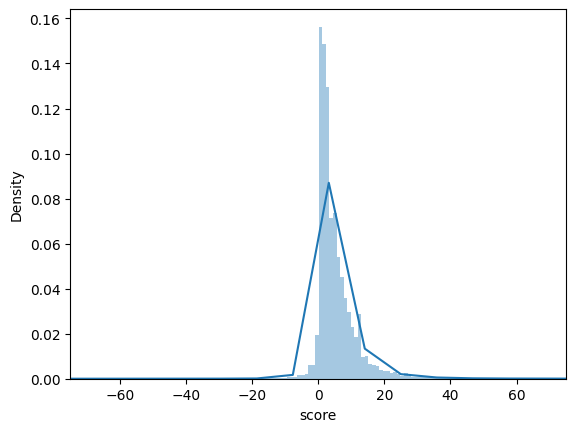

In [189]:
sns.distplot(filtered_comments.score, bins=2000)
plt.xlim(left=-75, right=75)